In [38]:
import pandas as pd
import gseapy as gp
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import pickle
import anndata
from gseapy import barplot, dotplot, enrichment_map
import umap
import networkx as nx
import math
import anndata as ad
import scanpy
import scipy
from collections import Counter
import sklearn as skl
import seaborn as sns

In [2]:
path = os.getcwd()
l1 = path + "/result-level1"
l2 = path + "/result-level2"
l3 = path + "/result-level3"
info = path + "/info"
labels = path + "/labels"

In [3]:
with open(os.path.join(info, "patient_to_disease_group.pickle"), "rb") as f:
    patient_to_disease_group = pickle.load(f) 
with open(os.path.join(info, "patient_to_disease.pickle"), "rb") as f:
    patient_to_disease = pickle.load(f) 
with open(os.path.join(info, "graphs_74_l1.pickle"), "rb") as f:
    level1_graphs = pickle.load(f) 

In [4]:
dg_dataframe = pd.DataFrame(list(level1_graphs["G0"].obs.DiseaseGroup.to_dict().values()), index = list(level1_graphs["G0"].obs.DiseaseGroup.to_dict().keys()),  columns = ["DiseaseGroup"])
d_dataframe = pd.DataFrame(list(level1_graphs["G0"].obs.Disease.to_dict().values()), index = list(level1_graphs["G0"].obs.Disease.to_dict().keys()),  columns = ["Disease"])

# UMAP- LEVEL 1

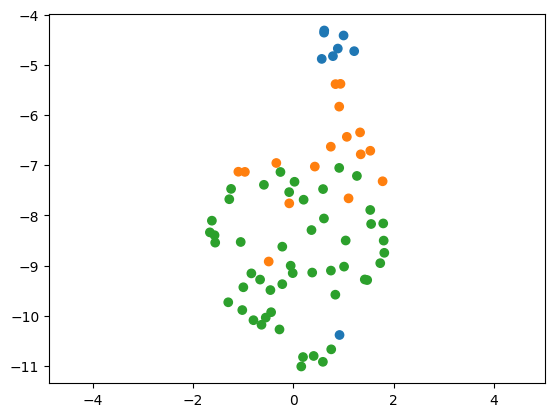

In [8]:
df = pd.read_csv(l1 + "/latent_data.csv").set_index("Sample")

reducer = umap.UMAP()
embedding1 = reducer.fit_transform(df)

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in dg_dataframe.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])
plt.gca().set_aspect('equal', 'datalim')

In [9]:
ad_obj1 = ad.AnnData(df)
scanpy.pp.neighbors(ad_obj1, n_neighbors=7, metric='sqeuclidean', use_rep='X')
neighbors = scipy.sparse.csr_matrix.todense(ad_obj1.obsp["connectivities"])

labels_dg_1 = {}
labels_d_1 = {}

for i,n in enumerate(neighbors):
   nearest_neighbors = n.nonzero()[1]
   counts = dict(Counter(list(dg_dataframe.T[list(ad_obj1.obs_names[nearest_neighbors])].T["DiseaseGroup"])))
   counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
   label = list(counts.keys())[-1]
   labels_dg_1[ad_obj1.obs_names[i]] = label

   counts = dict(Counter(list(d_dataframe.T[list(ad_obj1.obs_names[nearest_neighbors])].T["Disease"])))
   counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
   label = list(counts.keys())[-1]
   labels_d_1[ad_obj1.obs_names[i]] = label

binary_l1_dg = {}
for k,v in labels_dg_1.items():
    binary_l1_dg[k] = dg_dataframe.loc[k, "DiseaseGroup"] == v

binary_l1_d = {}
for k,v in labels_d_1.items():
    binary_l1_d[k] = d_dataframe.loc[k, "Disease"] == v


In [10]:
acc1_dg = round(sum(list(binary_l1_dg.values()))/ 74, 4)
acc1_d = round(sum(list(binary_l1_d.values()))/ 74, 4)

f11_dg = round(skl.metrics.f1_score(list(dg_dataframe["DiseaseGroup"]), list(labels_dg_1.values()), average = "weighted"),4)
f11_d = round(skl.metrics.f1_score(list(d_dataframe["Disease"]), list(labels_d_1.values()), average = "weighted"),4)

print("L1     acc d:", acc1_d, ", acc dg:", acc1_dg, ", f1 d:", f11_d, ", f1 dg:",f11_dg )

L1     acc d: 0.5405 , acc dg: 0.8784 , f1 d: 0.4954 , f1 dg: 0.8694


# UMAP- LEVEL 2

Text(0.5, 1.0, 'Disease Group')

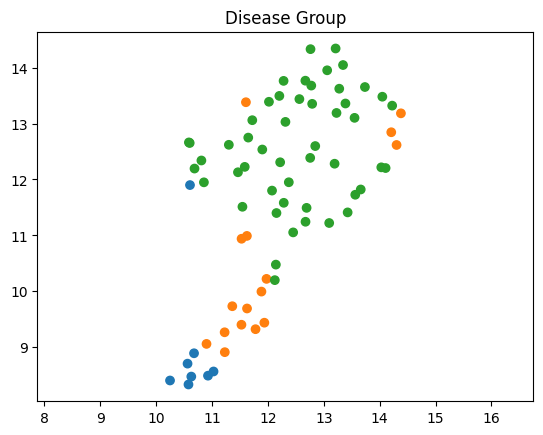

In [14]:
df = pd.read_csv(l2 + "/latent_data.csv").set_index("Sample")

reducer = umap.UMAP()
embedding1 = reducer.fit_transform(df)

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in dg_dataframe.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")

In [16]:
ad_obj2 = ad.AnnData(df)
scanpy.pp.neighbors(ad_obj2, n_neighbors=7, metric='sqeuclidean', use_rep='X')
neighbors = scipy.sparse.csr_matrix.todense(ad_obj2.obsp["connectivities"])

labels_dg_2 = {}
labels_d_2 = {}

for i,n in enumerate(neighbors):
   nearest_neighbors = n.nonzero()[1]
   counts = dict(Counter(list(dg_dataframe.T[list(ad_obj2.obs_names[nearest_neighbors])].T["DiseaseGroup"])))
   counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
   label = list(counts.keys())[-1]
   labels_dg_2[ad_obj2.obs_names[i]] = label

   counts = dict(Counter(list(d_dataframe.T[list(ad_obj2.obs_names[nearest_neighbors])].T["Disease"])))
   counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
   label = list(counts.keys())[-1]
   labels_d_2[ad_obj2.obs_names[i]] = label

binary_l2_dg = {}
for k,v in labels_dg_2.items():
    binary_l2_dg[k] = dg_dataframe.loc[k, "DiseaseGroup"] == v

binary_l2_d = {}
for k,v in labels_d_2.items():
    binary_l2_d[k] = d_dataframe.loc[k, "Disease"] == v


In [17]:
acc2_dg = round(sum(list(binary_l2_dg.values()))/ 74, 4)
acc2_d = round(sum(list(binary_l2_d.values()))/ 74, 4)

f12_dg = round(skl.metrics.f1_score(list(dg_dataframe["DiseaseGroup"]), list(labels_dg_2.values()), average = "weighted"),4)
f12_d = round(skl.metrics.f1_score(list(d_dataframe["Disease"]), list(labels_d_2.values()), average = "weighted"),4)

print("L2     acc d:", acc2_d, ", acc dg:", acc2_dg, ", f1 d:", f12_d, ", f1 dg:",f12_dg )

L2     acc d: 0.5405 , acc dg: 0.8649 , f1 d: 0.502 , f1 dg: 0.8555


# UMAP- LEVEL 3

Text(0.5, 1.0, 'Disease Group')

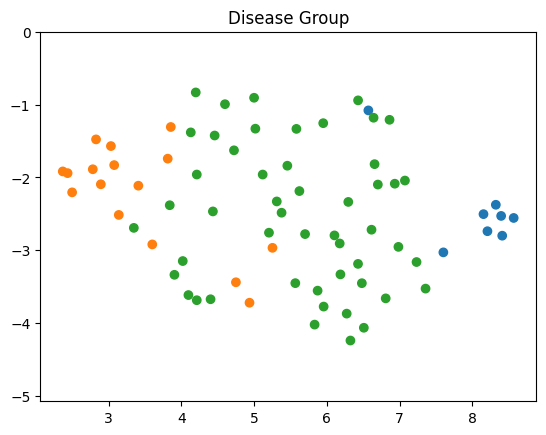

In [21]:
df = pd.read_csv(l3 + "/latent_data.csv").set_index("Sample")

reducer1 = umap.UMAP()
embedding1 = reducer1.fit_transform(df)

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in dg_dataframe.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")

In [23]:
ad_obj3 = ad.AnnData(df)
scanpy.pp.neighbors(ad_obj3, n_neighbors=7, metric='sqeuclidean', use_rep='X')
neighbors = scipy.sparse.csr_matrix.todense(ad_obj3.obsp["connectivities"])

labels_dg_3 = {}
labels_d_3 = {}

for i,n in enumerate(neighbors):
   nearest_neighbors = n.nonzero()[1]
   counts = dict(Counter(list(dg_dataframe.T[list(ad_obj3.obs_names[nearest_neighbors])].T["DiseaseGroup"])))
   counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
   label = list(counts.keys())[-1]
   labels_dg_3[ad_obj3.obs_names[i]] = label

   counts = dict(Counter(list(d_dataframe.T[list(ad_obj3.obs_names[nearest_neighbors])].T["Disease"])))
   counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
   label = list(counts.keys())[-1]
   labels_d_3[ad_obj3.obs_names[i]] = label

binary_l3_dg = {}
for k,v in labels_dg_3.items():
    binary_l3_dg[k] = dg_dataframe.loc[k, "DiseaseGroup"] == v

binary_l3_d = {}
for k,v in labels_d_3.items():
    binary_l3_d[k] = d_dataframe.loc[k, "Disease"] == v


In [24]:
acc3_dg = round(sum(list(binary_l3_dg.values()))/ 74, 4)
acc3_d = round(sum(list(binary_l3_d.values()))/ 74, 4)

f13_dg = round(skl.metrics.f1_score(list(dg_dataframe["DiseaseGroup"]), list(labels_dg_3.values()), average = "weighted"),4)
f13_d = round(skl.metrics.f1_score(list(d_dataframe["Disease"]), list(labels_d_3.values()), average = "weighted"),4)

print("L3     acc d:", acc3_d, ", acc dg:", acc3_dg, ", f1 d:", f13_d, ", f1 dg:",f13_dg )

L3     acc d: 0.5541 , acc dg: 0.8514 , f1 d: 0.5235 , f1 dg: 0.8385


# Enrichment - L1

In [31]:
i = 0
results_L1 = {}
feature_set = ["KEGG_2021_Human", "MSigDB_Hallmark_2020"]

for filename in os.listdir(l1):
    if filename.find("topn") > -1:
        data_path = os.path.join(l1, filename)
        df = pd.read_csv(data_path, header=0, index_col=None)["epoch_150"]
        features = []
        for item in list(df):
            if item.find("citeRNA") > -1:
                item = item.split("citeRNA")[0]  
            elif item.find("bulkRNA") > -1:
                item = item.split("bulkRNA")[0]  
            elif item.find("facs") > -1:
                item = item.split("facs")[0]  
            elif item.find("luminex") > -1:
                item = item.split("luminex")[0]  
            elif item.find("cytof") > -1:
                item = item.split("cytof")[0]  
            elif item.find("adt") > -1:
                item = item.split("adt")[0] 
            features.append(item)

        enr = gp.enrichr(gene_list=features, # or "./tests/data/gene_list.txt",
                 #gene_sets=gp.get_library_name(organism='Human'),
                 gene_sets = feature_set,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

        if not filename.find("luminex") > -1 and not filename.find("bulkRNA_black") > -1: 
            print(filename)
            pre_res = gp.prerank(rnk=pd.DataFrame({"data" :features, "rank": [i for i in range(len(features))]}).set_index("data"), # or rnk = rnk,
                        gene_sets=feature_set,
                        threads=4,
                        min_size=2,
                        max_size=1500,
                        permutation_num=1000, # reduce number to speed up testing
                        outdir=None, # don't write to disk
                        seed=6,
                        verbose=True, # see what's going on behind the scenes
                        )
                
        results_L1[filename] = {"ranked":pre_res, "non-ranked": enr}

2023-09-29 12:38:49,752 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:38:49,753 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:49,755 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:49,761 [INFO] 0058 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:38:49,761 [INFO] 0033 gene_sets used for further statistical testing.....
2023-09-29 12:38:49,762 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:38:49,798 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-red.csv


2023-09-29 12:38:53,737 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:38:53,738 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:53,741 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:53,746 [INFO] 0053 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:38:53,747 [INFO] 0038 gene_sets used for further statistical testing.....
2023-09-29 12:38:53,747 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:38:53,784 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-black.csv


2023-09-29 12:38:57,788 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:38:57,789 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:57,791 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:57,797 [INFO] 0057 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:38:57,797 [INFO] 0034 gene_sets used for further statistical testing.....
2023-09-29 12:38:57,797 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:38:57,837 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-magenta.csv


2023-09-29 12:39:01,845 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:39:01,845 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:01,847 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:01,851 [INFO] 0047 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:39:01,851 [INFO] 0044 gene_sets used for further statistical testing.....
2023-09-29 12:39:01,852 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:39:01,894 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-greenyellow.csv


2023-09-29 12:39:05,921 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:39:05,923 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:05,927 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:05,934 [INFO] 0040 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:39:05,935 [INFO] 0051 gene_sets used for further statistical testing.....
2023-09-29 12:39:05,935 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:39:05,983 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-magenta.csv


2023-09-29 12:39:09,838 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:39:09,839 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:09,842 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:09,846 [INFO] 0049 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:39:09,846 [INFO] 0042 gene_sets used for further statistical testing.....
2023-09-29 12:39:09,846 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:39:09,875 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-lightcyan.csv


2023-09-29 12:39:13,772 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:39:13,773 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:13,777 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:13,781 [INFO] 0064 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:39:13,781 [INFO] 0027 gene_sets used for further statistical testing.....
2023-09-29 12:39:13,782 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:39:13,800 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-yellow.csv


2023-09-29 12:39:17,700 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:39:17,702 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:17,705 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:17,712 [INFO] 0050 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:39:17,712 [INFO] 0041 gene_sets used for further statistical testing.....
2023-09-29 12:39:17,713 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:39:17,750 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-lightcyan.csv


2023-09-29 12:39:21,763 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:39:21,764 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:21,766 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:21,770 [INFO] 0048 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:39:21,771 [INFO] 0043 gene_sets used for further statistical testing.....
2023-09-29 12:39:21,771 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:39:21,814 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-cyan.csv


2023-09-29 12:39:25,796 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:39:25,797 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:25,798 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:25,801 [INFO] 0038 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:39:25,801 [INFO] 0053 gene_sets used for further statistical testing.....
2023-09-29 12:39:25,802 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:39:25,843 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-grey60.csv


2023-09-29 12:39:30,212 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:39:30,214 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:30,217 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:30,223 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:39:30,224 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:39:30,224 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:39:30,266 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-tan.csv


2023-09-29 12:39:34,319 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:39:34,320 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:34,323 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:34,328 [INFO] 0048 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:39:34,329 [INFO] 0043 gene_sets used for further statistical testing.....
2023-09-29 12:39:34,329 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:39:34,374 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-cyan.csv


2023-09-29 12:39:38,058 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:39:38,061 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:38,064 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:38,071 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:39:38,071 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:39:38,071 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:39:38,108 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-lightyellow.csv


2023-09-29 12:39:42,005 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:39:42,006 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:42,008 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:42,014 [INFO] 0069 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:39:42,015 [INFO] 0022 gene_sets used for further statistical testing.....
2023-09-29 12:39:42,015 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:39:42,045 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_bulkRNA_magenta.csv


2023-09-29 12:39:45,978 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:39:45,981 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:45,985 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:45,992 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:39:45,992 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:39:45,993 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:39:46,035 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-turquoise.csv


2023-09-29 12:39:50,168 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:39:50,169 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:50,171 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:50,175 [INFO] 0047 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:39:50,175 [INFO] 0044 gene_sets used for further statistical testing.....
2023-09-29 12:39:50,176 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:39:50,216 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-turquoise.csv


2023-09-29 12:39:54,386 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:39:54,387 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:54,391 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:54,396 [INFO] 0068 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:39:54,396 [INFO] 0023 gene_sets used for further statistical testing.....
2023-09-29 12:39:54,396 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:39:54,432 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-purple.csv


2023-09-29 12:39:58,349 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:39:58,351 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:58,354 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:39:58,360 [INFO] 0051 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:39:58,361 [INFO] 0040 gene_sets used for further statistical testing.....
2023-09-29 12:39:58,361 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:39:58,406 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-pink.csv


2023-09-29 12:40:02,633 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:40:02,635 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:02,639 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:02,646 [INFO] 0055 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:40:02,647 [INFO] 0036 gene_sets used for further statistical testing.....
2023-09-29 12:40:02,648 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:40:02,682 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-blue.csv


2023-09-29 12:40:06,504 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:40:06,508 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:06,511 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:06,518 [INFO] 0048 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:40:06,519 [INFO] 0043 gene_sets used for further statistical testing.....
2023-09-29 12:40:06,520 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:40:06,565 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-blue.csv


2023-09-29 12:40:10,927 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:40:10,928 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:10,931 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:10,937 [INFO] 0059 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:40:10,937 [INFO] 0032 gene_sets used for further statistical testing.....
2023-09-29 12:40:10,938 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:40:10,971 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-pink.csv


2023-09-29 12:40:15,274 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:40:15,275 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:15,278 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:15,284 [INFO] 0056 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:40:15,284 [INFO] 0035 gene_sets used for further statistical testing.....
2023-09-29 12:40:15,285 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:40:15,326 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-lightgreen.csv


2023-09-29 12:40:19,456 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:40:19,457 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:19,460 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:19,466 [INFO] 0052 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:40:19,467 [INFO] 0039 gene_sets used for further statistical testing.....
2023-09-29 12:40:19,467 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:40:19,507 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-greenyellow.csv


2023-09-29 12:40:23,428 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:40:23,429 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:23,430 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:23,433 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:40:23,433 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:40:23,433 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:40:23,465 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-lightcyan.csv


2023-09-29 12:40:27,046 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:40:27,047 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:27,050 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:27,056 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:40:27,057 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:40:27,057 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:40:27,095 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-lightyellow.csv


2023-09-29 12:40:31,166 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:40:31,172 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:31,174 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:31,178 [INFO] 0057 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:40:31,179 [INFO] 0034 gene_sets used for further statistical testing.....
2023-09-29 12:40:31,179 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:40:31,216 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-green.csv


2023-09-29 12:40:35,344 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:40:35,346 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:35,351 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:35,358 [INFO] 0056 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:40:35,358 [INFO] 0035 gene_sets used for further statistical testing.....
2023-09-29 12:40:35,358 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:40:35,393 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-magenta.csv


2023-09-29 12:40:39,329 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:40:39,330 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:39,333 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:39,339 [INFO] 0061 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:40:39,339 [INFO] 0030 gene_sets used for further statistical testing.....
2023-09-29 12:40:39,339 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:40:39,380 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-magenta.csv


2023-09-29 12:40:42,967 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:40:42,970 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:42,973 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:42,979 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:40:42,979 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:40:42,980 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:40:43,011 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-lightyellow.csv


2023-09-29 12:40:47,012 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:40:47,014 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:47,016 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:47,022 [INFO] 0067 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:40:47,022 [INFO] 0024 gene_sets used for further statistical testing.....
2023-09-29 12:40:47,023 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:40:47,059 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_bulkRNA_purple.csv


2023-09-29 12:40:50,405 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:40:50,407 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:50,410 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:50,416 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:40:50,417 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:40:50,417 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:40:50,431 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_cMono.csv


2023-09-29 12:40:54,276 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:40:54,277 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:54,278 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:54,283 [INFO] 0053 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:40:54,283 [INFO] 0038 gene_sets used for further statistical testing.....
2023-09-29 12:40:54,284 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:40:54,318 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-lightgreen.csv


2023-09-29 12:40:58,156 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:40:58,159 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:58,163 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:40:58,169 [INFO] 0060 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:40:58,170 [INFO] 0031 gene_sets used for further statistical testing.....
2023-09-29 12:40:58,170 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:40:58,209 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-lightgreen.csv


2023-09-29 12:41:02,093 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:41:02,094 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:02,096 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:02,103 [INFO] 0067 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:41:02,103 [INFO] 0024 gene_sets used for further statistical testing.....
2023-09-29 12:41:02,103 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:41:02,140 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-turquoise.csv


2023-09-29 12:41:05,956 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:41:05,956 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:05,959 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:05,963 [INFO] 0053 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:41:05,963 [INFO] 0038 gene_sets used for further statistical testing.....
2023-09-29 12:41:05,964 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:41:06,009 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-lightgreen.csv


2023-09-29 12:41:09,929 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:41:09,931 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:09,934 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:09,940 [INFO] 0053 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:41:09,941 [INFO] 0038 gene_sets used for further statistical testing.....
2023-09-29 12:41:09,941 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:41:09,987 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-greenyellow.csv


2023-09-29 12:41:14,040 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:41:14,042 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:14,045 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:14,051 [INFO] 0061 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:41:14,051 [INFO] 0030 gene_sets used for further statistical testing.....
2023-09-29 12:41:14,052 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:41:14,084 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-purple.csv


2023-09-29 12:41:17,703 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:41:17,704 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:17,707 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:17,713 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:41:17,714 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:41:17,714 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:41:17,743 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-lightyellow.csv


2023-09-29 12:41:21,627 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:41:21,628 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:21,630 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:21,632 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:41:21,633 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:41:21,633 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:41:21,664 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-yellow.csv


2023-09-29 12:41:25,610 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:41:25,611 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:25,614 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:25,620 [INFO] 0057 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:41:25,620 [INFO] 0034 gene_sets used for further statistical testing.....
2023-09-29 12:41:25,621 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:41:25,663 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-magenta.csv


2023-09-29 12:41:29,609 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:41:29,611 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:29,613 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:29,617 [INFO] 0070 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:41:29,618 [INFO] 0021 gene_sets used for further statistical testing.....
2023-09-29 12:41:29,618 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:41:29,654 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-salmon.csv


2023-09-29 12:41:33,590 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:41:33,592 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:33,596 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:33,604 [INFO] 0050 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:41:33,604 [INFO] 0041 gene_sets used for further statistical testing.....
2023-09-29 12:41:33,605 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:41:33,651 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-greenyellow.csv


2023-09-29 12:41:37,496 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:41:37,497 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:37,500 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:37,506 [INFO] 0049 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:41:37,506 [INFO] 0042 gene_sets used for further statistical testing.....
2023-09-29 12:41:37,507 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:41:37,543 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-yellow.csv


2023-09-29 12:41:41,471 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:41:41,473 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:41,476 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:41,482 [INFO] 0055 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:41:41,483 [INFO] 0036 gene_sets used for further statistical testing.....
2023-09-29 12:41:41,483 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:41:41,526 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-greenyellow.csv


2023-09-29 12:41:45,580 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:41:45,583 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:45,585 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:45,591 [INFO] 0045 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:41:45,592 [INFO] 0046 gene_sets used for further statistical testing.....
2023-09-29 12:41:45,592 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:41:45,629 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-tan.csv


2023-09-29 12:41:49,659 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:41:49,660 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:49,663 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:49,667 [INFO] 0052 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:41:49,667 [INFO] 0039 gene_sets used for further statistical testing.....
2023-09-29 12:41:49,667 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:41:49,709 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-cyan.csv


2023-09-29 12:41:53,677 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:41:53,678 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:53,681 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:53,687 [INFO] 0049 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:41:53,687 [INFO] 0042 gene_sets used for further statistical testing.....
2023-09-29 12:41:53,688 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:41:53,724 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-blue.csv


2023-09-29 12:41:57,760 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:41:57,761 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:57,764 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:41:57,771 [INFO] 0048 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:41:57,771 [INFO] 0043 gene_sets used for further statistical testing.....
2023-09-29 12:41:57,772 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:41:57,815 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-pink.csv


2023-09-29 12:42:01,853 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:42:01,854 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:01,857 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:01,863 [INFO] 0049 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:42:01,864 [INFO] 0042 gene_sets used for further statistical testing.....
2023-09-29 12:42:01,864 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:42:01,914 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-turquoise.csv


2023-09-29 12:42:05,845 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:42:05,846 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:05,848 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:05,851 [INFO] 0058 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:42:05,851 [INFO] 0033 gene_sets used for further statistical testing.....
2023-09-29 12:42:05,852 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:42:05,888 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-blue.csv


2023-09-29 12:42:09,982 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:42:09,983 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:09,988 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:09,995 [INFO] 0050 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:42:09,995 [INFO] 0041 gene_sets used for further statistical testing.....
2023-09-29 12:42:09,996 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:42:10,042 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-pink.csv


2023-09-29 12:42:14,053 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:42:14,054 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:14,057 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:14,063 [INFO] 0073 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:42:14,063 [INFO] 0018 gene_sets used for further statistical testing.....
2023-09-29 12:42:14,063 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:42:14,090 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_bulkRNA_cyan.csv


2023-09-29 12:42:18,132 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:42:18,132 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:18,134 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:18,139 [INFO] 0059 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:42:18,139 [INFO] 0032 gene_sets used for further statistical testing.....
2023-09-29 12:42:18,139 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:42:18,168 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-green.csv


2023-09-29 12:42:22,062 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:42:22,063 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:22,066 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:22,072 [INFO] 0048 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:42:22,073 [INFO] 0043 gene_sets used for further statistical testing.....
2023-09-29 12:42:22,073 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:42:22,118 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-lightcyan.csv


2023-09-29 12:42:25,922 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:42:25,924 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:25,927 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:25,933 [INFO] 0070 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:42:25,934 [INFO] 0021 gene_sets used for further statistical testing.....
2023-09-29 12:42:25,934 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:42:25,969 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-salmon.csv


2023-09-29 12:42:30,016 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:42:30,017 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:30,019 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:30,025 [INFO] 0050 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:42:30,026 [INFO] 0041 gene_sets used for further statistical testing.....
2023-09-29 12:42:30,026 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:42:30,071 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-green.csv


2023-09-29 12:42:33,786 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:42:33,787 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:33,790 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:33,796 [INFO] 0071 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:42:33,796 [INFO] 0020 gene_sets used for further statistical testing.....
2023-09-29 12:42:33,797 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:42:33,827 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_bulkRNA_grey60.csv


2023-09-29 12:42:37,725 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:42:37,727 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:37,729 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:37,736 [INFO] 0066 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:42:37,736 [INFO] 0025 gene_sets used for further statistical testing.....
2023-09-29 12:42:37,737 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:42:37,775 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-red.csv


2023-09-29 12:42:41,695 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:42:41,696 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:41,699 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:41,705 [INFO] 0056 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:42:41,705 [INFO] 0035 gene_sets used for further statistical testing.....
2023-09-29 12:42:41,706 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:42:41,747 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-green.csv


2023-09-29 12:42:45,681 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:42:45,682 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:45,685 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:45,690 [INFO] 0059 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:42:45,691 [INFO] 0032 gene_sets used for further statistical testing.....
2023-09-29 12:42:45,691 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:42:45,732 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_bulkRNA_greenyellow.csv


2023-09-29 12:42:49,571 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:42:49,573 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:49,576 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:49,583 [INFO] 0070 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:42:49,583 [INFO] 0021 gene_sets used for further statistical testing.....
2023-09-29 12:42:49,583 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:42:49,620 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-salmon.csv


2023-09-29 12:42:53,671 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:42:53,672 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:53,675 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:53,681 [INFO] 0043 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:42:53,681 [INFO] 0048 gene_sets used for further statistical testing.....
2023-09-29 12:42:53,682 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:42:53,725 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-grey60.csv


2023-09-29 12:42:57,745 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:42:57,746 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:57,750 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:42:57,757 [INFO] 0048 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:42:57,758 [INFO] 0043 gene_sets used for further statistical testing.....
2023-09-29 12:42:57,758 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:42:57,804 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-black.csv


2023-09-29 12:43:01,547 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:43:01,549 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:01,551 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:01,556 [INFO] 0070 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:43:01,557 [INFO] 0021 gene_sets used for further statistical testing.....
2023-09-29 12:43:01,557 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:43:01,589 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-salmon.csv


2023-09-29 12:43:05,274 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:43:05,276 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:05,281 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:05,288 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:43:05,288 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:43:05,289 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:43:05,324 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-lightyellow.csv


2023-09-29 12:43:09,204 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:43:09,205 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:09,207 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:09,212 [INFO] 0050 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:43:09,213 [INFO] 0041 gene_sets used for further statistical testing.....
2023-09-29 12:43:09,213 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:43:09,244 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-lightgreen.csv


2023-09-29 12:43:13,094 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:43:13,094 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:13,096 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:13,101 [INFO] 0048 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:43:13,101 [INFO] 0043 gene_sets used for further statistical testing.....
2023-09-29 12:43:13,102 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:43:13,136 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-cyan.csv


2023-09-29 12:43:16,985 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:43:16,986 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:16,988 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:16,992 [INFO] 0041 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:43:16,993 [INFO] 0050 gene_sets used for further statistical testing.....
2023-09-29 12:43:16,993 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:43:17,031 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-cyan.csv


2023-09-29 12:43:20,781 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:43:20,782 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:20,784 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:20,789 [INFO] 0066 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:43:20,789 [INFO] 0025 gene_sets used for further statistical testing.....
2023-09-29 12:43:20,790 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:43:20,822 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-midnightblue.csv


2023-09-29 12:43:24,571 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:43:24,571 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:24,574 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:24,578 [INFO] 0038 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:43:24,579 [INFO] 0053 gene_sets used for further statistical testing.....
2023-09-29 12:43:24,579 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:43:24,616 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-grey60.csv


2023-09-29 12:43:28,434 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:43:28,435 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:28,437 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:28,441 [INFO] 0064 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:43:28,441 [INFO] 0027 gene_sets used for further statistical testing.....
2023-09-29 12:43:28,441 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:43:28,474 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-yellow.csv


2023-09-29 12:43:32,183 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:43:32,184 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:32,186 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:32,191 [INFO] 0051 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:43:32,191 [INFO] 0040 gene_sets used for further statistical testing.....
2023-09-29 12:43:32,192 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:43:32,224 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-magenta.csv


2023-09-29 12:43:35,912 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:43:35,912 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:35,915 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:35,920 [INFO] 0070 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:43:35,920 [INFO] 0021 gene_sets used for further statistical testing.....
2023-09-29 12:43:35,921 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:43:35,953 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-salmon.csv


2023-09-29 12:43:39,150 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:43:39,151 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:39,153 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:39,158 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:43:39,159 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:43:39,159 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:43:39,168 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_DC.csv


2023-09-29 12:43:43,035 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:43:43,036 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:43,038 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:43,043 [INFO] 0043 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:43:43,044 [INFO] 0048 gene_sets used for further statistical testing.....
2023-09-29 12:43:43,044 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:43:43,081 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-magenta.csv


2023-09-29 12:43:46,991 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:43:46,991 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:46,994 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:46,998 [INFO] 0050 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:43:46,999 [INFO] 0041 gene_sets used for further statistical testing.....
2023-09-29 12:43:46,999 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:43:47,037 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-lightcyan.csv


2023-09-29 12:43:50,780 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:43:50,780 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:50,783 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:50,788 [INFO] 0079 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:43:50,788 [INFO] 0012 gene_sets used for further statistical testing.....
2023-09-29 12:43:50,788 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:43:50,814 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_DC.csv


2023-09-29 12:43:57,705 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:43:57,705 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:57,706 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:43:57,709 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:43:57,709 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:43:57,709 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:43:57,715 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_CD8.csv


2023-09-29 12:44:01,652 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:44:01,653 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:01,654 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:01,657 [INFO] 0049 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:44:01,657 [INFO] 0042 gene_sets used for further statistical testing.....
2023-09-29 12:44:01,658 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:44:01,689 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-grey60.csv


2023-09-29 12:44:05,691 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:44:05,691 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:05,693 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:05,696 [INFO] 0052 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:44:05,696 [INFO] 0039 gene_sets used for further statistical testing.....
2023-09-29 12:44:05,696 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:44:05,723 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-tan.csv


2023-09-29 12:44:09,717 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:44:09,718 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:09,720 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:09,725 [INFO] 0042 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:44:09,725 [INFO] 0049 gene_sets used for further statistical testing.....
2023-09-29 12:44:09,726 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:44:09,762 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-black.csv


2023-09-29 12:44:13,716 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:44:13,717 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:13,719 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:13,724 [INFO] 0052 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:44:13,724 [INFO] 0039 gene_sets used for further statistical testing.....
2023-09-29 12:44:13,725 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:44:13,758 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-midnightblue.csv


2023-09-29 12:44:17,734 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:44:17,735 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:17,737 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:17,742 [INFO] 0056 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:44:17,742 [INFO] 0035 gene_sets used for further statistical testing.....
2023-09-29 12:44:17,742 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:44:17,779 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-greenyellow.csv


2023-09-29 12:44:21,807 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:44:21,808 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:21,810 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:21,815 [INFO] 0045 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:44:21,816 [INFO] 0046 gene_sets used for further statistical testing.....
2023-09-29 12:44:21,816 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:44:21,851 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-yellow.csv


2023-09-29 12:44:25,893 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:44:25,894 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:25,896 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:25,901 [INFO] 0078 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:44:25,901 [INFO] 0013 gene_sets used for further statistical testing.....
2023-09-29 12:44:25,901 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:44:25,921 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_bulkRNA_midnightblue.csv


2023-09-29 12:44:29,957 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:44:29,957 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:29,959 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:29,964 [INFO] 0063 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:44:29,965 [INFO] 0028 gene_sets used for further statistical testing.....
2023-09-29 12:44:29,965 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:44:29,995 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-purple.csv


2023-09-29 12:44:33,983 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:44:33,984 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:33,987 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:33,991 [INFO] 0050 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:44:33,992 [INFO] 0041 gene_sets used for further statistical testing.....
2023-09-29 12:44:33,992 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:44:34,026 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-purple.csv


2023-09-29 12:44:38,076 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:44:38,077 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:38,079 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:38,084 [INFO] 0060 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:44:38,084 [INFO] 0031 gene_sets used for further statistical testing.....
2023-09-29 12:44:38,085 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:44:38,113 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-black.csv


2023-09-29 12:44:41,774 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:44:41,775 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:41,777 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:41,781 [INFO] 0070 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:44:41,782 [INFO] 0021 gene_sets used for further statistical testing.....
2023-09-29 12:44:41,782 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:44:41,806 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-salmon.csv


2023-09-29 12:44:45,760 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:44:45,760 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:45,761 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:45,764 [INFO] 0039 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:44:45,764 [INFO] 0052 gene_sets used for further statistical testing.....
2023-09-29 12:44:45,765 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:44:45,807 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-lightcyan.csv


2023-09-29 12:44:49,267 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:44:49,268 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:49,270 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:49,275 [INFO] 0079 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:44:49,275 [INFO] 0012 gene_sets used for further statistical testing.....
2023-09-29 12:44:49,275 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:44:49,298 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_CD8.csv


2023-09-29 12:44:53,348 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:44:53,349 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:53,351 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:53,355 [INFO] 0051 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:44:53,356 [INFO] 0040 gene_sets used for further statistical testing.....
2023-09-29 12:44:53,356 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:44:53,387 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-yellow.csv


2023-09-29 12:44:57,441 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:44:57,442 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:57,444 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:44:57,449 [INFO] 0064 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:44:57,449 [INFO] 0027 gene_sets used for further statistical testing.....
2023-09-29 12:44:57,449 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:44:57,482 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-red.csv


2023-09-29 12:45:01,533 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:45:01,534 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:01,536 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:01,540 [INFO] 0052 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:45:01,540 [INFO] 0039 gene_sets used for further statistical testing.....
2023-09-29 12:45:01,541 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:45:01,577 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-yellow.csv


2023-09-29 12:45:05,634 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:45:05,635 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:05,638 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:05,642 [INFO] 0052 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:45:05,643 [INFO] 0039 gene_sets used for further statistical testing.....
2023-09-29 12:45:05,643 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:45:05,681 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-brown.csv


2023-09-29 12:45:09,726 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:45:09,726 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:09,728 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:09,733 [INFO] 0055 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:45:09,733 [INFO] 0036 gene_sets used for further statistical testing.....
2023-09-29 12:45:09,734 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:45:09,765 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-turquoise.csv


2023-09-29 12:45:13,308 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:45:13,309 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:13,312 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:13,316 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:45:13,317 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:45:13,317 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:45:13,348 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-lightyellow.csv


2023-09-29 12:45:17,104 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:45:17,105 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:17,107 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:17,112 [INFO] 0070 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:45:17,112 [INFO] 0021 gene_sets used for further statistical testing.....
2023-09-29 12:45:17,112 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:45:17,143 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-salmon.csv


2023-09-29 12:45:21,202 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:45:21,202 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:21,205 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:21,210 [INFO] 0061 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:45:21,210 [INFO] 0030 gene_sets used for further statistical testing.....
2023-09-29 12:45:21,211 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:45:21,242 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-red.csv


2023-09-29 12:45:24,656 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:45:24,657 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:24,660 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:24,664 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:45:24,664 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:45:24,665 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:45:24,692 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-lightyellow.csv


2023-09-29 12:45:27,765 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:45:27,766 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:27,768 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:27,775 [INFO] 0090 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:45:27,775 [INFO] 0001 gene_sets used for further statistical testing.....
2023-09-29 12:45:27,775 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:45:27,779 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_facs.csv


2023-09-29 12:45:31,340 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:45:31,341 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:31,343 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:31,347 [INFO] 0079 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:45:31,347 [INFO] 0012 gene_sets used for further statistical testing.....
2023-09-29 12:45:31,347 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:45:31,373 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_B.csv


2023-09-29 12:45:34,827 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:45:34,827 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:34,829 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:34,834 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:45:34,835 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:45:34,835 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:45:34,864 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-lightyellow.csv


2023-09-29 12:45:38,804 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:45:38,805 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:38,806 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:38,810 [INFO] 0063 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:45:38,811 [INFO] 0028 gene_sets used for further statistical testing.....
2023-09-29 12:45:38,811 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:45:38,842 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-midnightblue.csv


2023-09-29 12:45:42,804 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:45:42,804 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:42,806 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:42,811 [INFO] 0055 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:45:42,812 [INFO] 0036 gene_sets used for further statistical testing.....
2023-09-29 12:45:42,812 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:45:42,852 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-pink.csv


2023-09-29 12:45:46,895 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:45:46,895 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:46,897 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:46,902 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:45:46,902 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:45:46,902 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:45:46,939 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-blue.csv


2023-09-29 12:45:50,981 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:45:50,982 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:50,984 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:50,988 [INFO] 0038 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:45:50,989 [INFO] 0053 gene_sets used for further statistical testing.....
2023-09-29 12:45:50,989 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:45:51,026 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-tan.csv


2023-09-29 12:45:55,077 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:45:55,077 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:55,079 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:55,083 [INFO] 0059 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:45:55,083 [INFO] 0032 gene_sets used for further statistical testing.....
2023-09-29 12:45:55,084 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:45:55,106 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-midnightblue.csv


2023-09-29 12:45:59,108 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:45:59,109 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:59,111 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:45:59,115 [INFO] 0050 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:45:59,115 [INFO] 0041 gene_sets used for further statistical testing.....
2023-09-29 12:45:59,116 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:45:59,157 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-midnightblue.csv


2023-09-29 12:46:03,155 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:46:03,155 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:03,157 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:03,159 [INFO] 0048 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:46:03,160 [INFO] 0043 gene_sets used for further statistical testing.....
2023-09-29 12:46:03,160 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:46:03,189 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-black.csv


2023-09-29 12:46:06,368 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:46:06,369 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:06,371 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:06,375 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:46:06,376 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:46:06,376 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:46:06,386 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_Basophil.csv


2023-09-29 12:46:10,418 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:46:10,418 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:10,420 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:10,424 [INFO] 0040 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:46:10,424 [INFO] 0051 gene_sets used for further statistical testing.....
2023-09-29 12:46:10,424 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:46:10,467 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_bulkRNA_lightcyan.csv


2023-09-29 12:46:14,401 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:46:14,401 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:14,403 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:14,408 [INFO] 0052 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:46:14,409 [INFO] 0039 gene_sets used for further statistical testing.....
2023-09-29 12:46:14,409 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:46:14,444 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-greenyellow.csv


2023-09-29 12:46:18,432 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:46:18,433 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:18,435 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:18,440 [INFO] 0060 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:46:18,440 [INFO] 0031 gene_sets used for further statistical testing.....
2023-09-29 12:46:18,440 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:46:18,475 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-greenyellow.csv


2023-09-29 12:46:22,237 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:46:22,237 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:22,240 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:22,244 [INFO] 0079 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:46:22,245 [INFO] 0012 gene_sets used for further statistical testing.....
2023-09-29 12:46:22,245 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:46:22,264 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_PB.csv


2023-09-29 12:46:26,319 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:46:26,320 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:26,322 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:26,326 [INFO] 0053 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:46:26,327 [INFO] 0038 gene_sets used for further statistical testing.....
2023-09-29 12:46:26,327 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:46:26,364 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-black.csv


2023-09-29 12:46:29,519 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:46:29,520 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:29,522 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:29,526 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:46:29,527 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:46:29,527 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:46:29,535 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_ncMono.csv


2023-09-29 12:46:33,186 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:46:33,187 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:33,190 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:33,194 [INFO] 0079 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:46:33,194 [INFO] 0012 gene_sets used for further statistical testing.....
2023-09-29 12:46:33,195 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:46:33,213 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_DP.csv


2023-09-29 12:46:37,284 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:46:37,285 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:37,287 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:37,291 [INFO] 0053 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:46:37,292 [INFO] 0038 gene_sets used for further statistical testing.....
2023-09-29 12:46:37,292 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:46:37,330 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-brown.csv


2023-09-29 12:46:41,411 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:46:41,412 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:41,414 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:41,418 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:46:41,419 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:46:41,419 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:46:41,457 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-lightgreen.csv


2023-09-29 12:46:45,477 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:46:45,478 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:45,480 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:45,484 [INFO] 0043 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:46:45,485 [INFO] 0048 gene_sets used for further statistical testing.....
2023-09-29 12:46:45,485 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:46:45,529 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-black.csv


2023-09-29 12:46:48,667 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:46:48,668 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:48,670 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:48,674 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:46:48,675 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:46:48,675 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:46:48,684 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_PB.csv


2023-09-29 12:46:52,745 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:46:52,746 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:52,748 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:52,752 [INFO] 0057 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:46:52,753 [INFO] 0034 gene_sets used for further statistical testing.....
2023-09-29 12:46:52,753 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:46:52,791 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-brown.csv


2023-09-29 12:46:56,842 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:46:56,843 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:56,845 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:46:56,850 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:46:56,850 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:46:56,850 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:46:56,889 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-midnightblue.csv


2023-09-29 12:47:00,940 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:47:00,941 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:00,943 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:00,947 [INFO] 0063 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:47:00,948 [INFO] 0028 gene_sets used for further statistical testing.....
2023-09-29 12:47:00,948 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:47:00,975 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-midnightblue.csv


2023-09-29 12:47:04,941 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:47:04,942 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:04,944 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:04,947 [INFO] 0040 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:47:04,947 [INFO] 0051 gene_sets used for further statistical testing.....
2023-09-29 12:47:04,948 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:47:04,987 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-brown.csv


2023-09-29 12:47:09,017 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:47:09,018 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:09,020 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:09,024 [INFO] 0053 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:47:09,025 [INFO] 0038 gene_sets used for further statistical testing.....
2023-09-29 12:47:09,025 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:47:09,058 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-blue.csv


2023-09-29 12:47:13,012 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:47:13,013 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:13,015 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:13,019 [INFO] 0058 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:47:13,020 [INFO] 0033 gene_sets used for further statistical testing.....
2023-09-29 12:47:13,020 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:47:13,050 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-pink.csv


2023-09-29 12:47:16,918 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:47:16,919 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:16,921 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:16,926 [INFO] 0056 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:47:16,926 [INFO] 0035 gene_sets used for further statistical testing.....
2023-09-29 12:47:16,927 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:47:16,963 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-lightgreen.csv


2023-09-29 12:47:20,903 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:47:20,903 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:20,906 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:20,910 [INFO] 0046 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:47:20,910 [INFO] 0045 gene_sets used for further statistical testing.....
2023-09-29 12:47:20,911 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:47:20,951 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-green.csv


2023-09-29 12:47:24,498 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:47:24,499 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:24,501 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:24,506 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:47:24,506 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:47:24,506 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:47:24,537 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-lightyellow.csv


2023-09-29 12:47:28,579 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:47:28,580 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:28,581 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:28,583 [INFO] 0046 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:47:28,583 [INFO] 0045 gene_sets used for further statistical testing.....
2023-09-29 12:47:28,583 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:47:28,610 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-cyan.csv


2023-09-29 12:47:32,565 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:47:32,566 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:32,568 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:32,572 [INFO] 0064 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:47:32,573 [INFO] 0027 gene_sets used for further statistical testing.....
2023-09-29 12:47:32,573 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:47:32,600 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-red.csv


2023-09-29 12:47:36,480 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:47:36,480 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:36,483 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:36,487 [INFO] 0056 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:47:36,488 [INFO] 0035 gene_sets used for further statistical testing.....
2023-09-29 12:47:36,488 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:47:36,525 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-midnightblue.csv


2023-09-29 12:47:40,567 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:47:40,568 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:40,570 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:40,574 [INFO] 0078 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:47:40,575 [INFO] 0013 gene_sets used for further statistical testing.....
2023-09-29 12:47:40,575 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:47:40,601 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_bulkRNA_turquoise.csv


2023-09-29 12:47:43,867 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:47:43,868 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:43,870 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:43,875 [INFO] 0082 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:47:43,875 [INFO] 0009 gene_sets used for further statistical testing.....
2023-09-29 12:47:43,876 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:47:43,889 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_bulkRNA_lightgreen.csv


2023-09-29 12:47:47,903 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:47:47,904 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:47,906 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:47,911 [INFO] 0053 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:47:47,911 [INFO] 0038 gene_sets used for further statistical testing.....
2023-09-29 12:47:47,911 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:47:47,947 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-green.csv


2023-09-29 12:47:51,835 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:47:51,836 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:51,838 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:51,842 [INFO] 0048 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:47:51,843 [INFO] 0043 gene_sets used for further statistical testing.....
2023-09-29 12:47:51,843 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:47:51,883 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-cyan.csv


2023-09-29 12:47:55,614 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:47:55,615 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:55,617 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:47:55,622 [INFO] 0070 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:47:55,622 [INFO] 0021 gene_sets used for further statistical testing.....
2023-09-29 12:47:55,622 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:47:55,652 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-salmon.csv


2023-09-29 12:48:02,903 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:48:02,904 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:02,906 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:02,910 [INFO] 0047 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:48:02,911 [INFO] 0044 gene_sets used for further statistical testing.....
2023-09-29 12:48:02,911 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:48:02,944 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-grey60.csv


2023-09-29 12:48:06,993 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:48:06,993 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:06,996 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:07,000 [INFO] 0064 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:48:07,000 [INFO] 0027 gene_sets used for further statistical testing.....
2023-09-29 12:48:07,001 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:48:07,031 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-brown.csv


2023-09-29 12:48:10,224 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:48:10,225 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:10,227 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:10,232 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:48:10,232 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:48:10,232 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:48:10,240 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_GDT.csv


2023-09-29 12:48:14,242 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:48:14,243 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:14,245 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:14,250 [INFO] 0062 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:48:14,250 [INFO] 0029 gene_sets used for further statistical testing.....
2023-09-29 12:48:14,250 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:48:14,278 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-tan.csv


2023-09-29 12:48:18,289 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:48:18,289 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:18,291 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:18,295 [INFO] 0049 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:48:18,296 [INFO] 0042 gene_sets used for further statistical testing.....
2023-09-29 12:48:18,296 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:48:18,330 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-greenyellow.csv


2023-09-29 12:48:22,300 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:48:22,301 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:22,303 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:22,307 [INFO] 0060 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:48:22,308 [INFO] 0031 gene_sets used for further statistical testing.....
2023-09-29 12:48:22,308 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:48:22,343 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-purple.csv


2023-09-29 12:48:25,929 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:48:25,930 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:25,932 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:25,936 [INFO] 0070 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:48:25,937 [INFO] 0021 gene_sets used for further statistical testing.....
2023-09-29 12:48:25,937 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:48:25,966 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-salmon.csv


2023-09-29 12:48:29,824 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:48:29,825 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:29,827 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:29,832 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:48:29,832 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:48:29,832 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:48:29,869 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-lightgreen.csv


2023-09-29 12:48:33,609 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:48:33,610 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:33,611 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:33,614 [INFO] 0079 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:48:33,614 [INFO] 0012 gene_sets used for further statistical testing.....
2023-09-29 12:48:33,614 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:48:33,634 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_GDT.csv


2023-09-29 12:48:37,706 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:48:37,707 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:37,709 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:37,714 [INFO] 0052 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:48:37,714 [INFO] 0039 gene_sets used for further statistical testing.....
2023-09-29 12:48:37,715 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:48:37,753 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-purple.csv


2023-09-29 12:48:41,903 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:48:41,904 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:41,906 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:41,910 [INFO] 0062 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:48:41,910 [INFO] 0029 gene_sets used for further statistical testing.....
2023-09-29 12:48:41,910 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:48:41,944 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-pink.csv


2023-09-29 12:48:45,901 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:48:45,902 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:45,904 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:45,908 [INFO] 0051 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:48:45,909 [INFO] 0040 gene_sets used for further statistical testing.....
2023-09-29 12:48:45,909 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:48:45,942 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-blue.csv


2023-09-29 12:48:49,906 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:48:49,907 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:49,909 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:49,914 [INFO] 0049 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:48:49,914 [INFO] 0042 gene_sets used for further statistical testing.....
2023-09-29 12:48:49,915 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:48:49,953 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-grey60.csv


2023-09-29 12:48:53,878 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:48:53,878 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:53,881 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:53,885 [INFO] 0057 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:48:53,885 [INFO] 0034 gene_sets used for further statistical testing.....
2023-09-29 12:48:53,886 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:48:53,921 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-yellow.csv


2023-09-29 12:48:57,972 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:48:57,972 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:57,974 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:48:57,978 [INFO] 0062 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:48:57,979 [INFO] 0029 gene_sets used for further statistical testing.....
2023-09-29 12:48:57,979 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:48:58,013 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-red.csv


2023-09-29 12:49:01,962 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:49:01,962 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:01,964 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:01,969 [INFO] 0062 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:49:01,970 [INFO] 0029 gene_sets used for further statistical testing.....
2023-09-29 12:49:01,970 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:49:02,003 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-red.csv


2023-09-29 12:49:05,969 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:49:05,970 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:05,972 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:05,976 [INFO] 0058 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:49:05,977 [INFO] 0033 gene_sets used for further statistical testing.....
2023-09-29 12:49:05,977 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:49:06,012 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-pink.csv


2023-09-29 12:49:10,043 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:49:10,043 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:10,046 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:10,050 [INFO] 0056 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:49:10,050 [INFO] 0035 gene_sets used for further statistical testing.....
2023-09-29 12:49:10,050 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:49:10,094 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-blue.csv


2023-09-29 12:49:13,757 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:49:13,757 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:13,760 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:13,764 [INFO] 0079 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:49:13,764 [INFO] 0012 gene_sets used for further statistical testing.....
2023-09-29 12:49:13,765 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:49:13,791 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_ncMono.csv


2023-09-29 12:49:17,843 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:49:17,843 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:17,845 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:17,849 [INFO] 0061 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:49:17,850 [INFO] 0030 gene_sets used for further statistical testing.....
2023-09-29 12:49:17,850 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:49:17,876 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-green.csv


2023-09-29 12:49:21,841 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:49:21,842 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:21,844 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:21,848 [INFO] 0049 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:49:21,849 [INFO] 0042 gene_sets used for further statistical testing.....
2023-09-29 12:49:21,849 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:49:21,883 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-lightgreen.csv


2023-09-29 12:49:25,829 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:49:25,830 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:25,832 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:25,836 [INFO] 0040 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:49:25,836 [INFO] 0051 gene_sets used for further statistical testing.....
2023-09-29 12:49:25,837 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:49:25,880 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-grey60.csv


2023-09-29 12:49:29,928 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:49:29,928 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:29,930 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:29,934 [INFO] 0064 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:49:29,934 [INFO] 0027 gene_sets used for further statistical testing.....
2023-09-29 12:49:29,934 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:49:29,961 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-turquoise.csv


2023-09-29 12:49:34,030 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:49:34,030 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:34,032 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:34,036 [INFO] 0043 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:49:34,036 [INFO] 0048 gene_sets used for further statistical testing.....
2023-09-29 12:49:34,037 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:49:34,094 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-green.csv


2023-09-29 12:49:38,077 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:49:38,078 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:38,080 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:38,084 [INFO] 0047 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:49:38,084 [INFO] 0044 gene_sets used for further statistical testing.....
2023-09-29 12:49:38,084 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:49:38,129 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-green.csv


2023-09-29 12:49:42,114 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:49:42,115 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:42,117 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:42,121 [INFO] 0045 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:49:42,122 [INFO] 0046 gene_sets used for further statistical testing.....
2023-09-29 12:49:42,122 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:49:42,160 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-pink.csv


2023-09-29 12:49:46,063 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:49:46,064 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:46,066 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:46,070 [INFO] 0051 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:49:46,070 [INFO] 0040 gene_sets used for further statistical testing.....
2023-09-29 12:49:46,071 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:49:46,109 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-blue.csv


2023-09-29 12:49:50,110 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:49:50,110 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:50,112 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:50,116 [INFO] 0043 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:49:50,117 [INFO] 0048 gene_sets used for further statistical testing.....
2023-09-29 12:49:50,117 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:49:50,163 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-cyan.csv


2023-09-29 12:49:54,180 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:49:54,181 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:54,183 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:54,187 [INFO] 0052 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:49:54,187 [INFO] 0039 gene_sets used for further statistical testing.....
2023-09-29 12:49:54,187 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:49:54,226 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-cyan.csv


2023-09-29 12:49:58,281 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:49:58,281 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:58,283 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:49:58,287 [INFO] 0076 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:49:58,288 [INFO] 0015 gene_sets used for further statistical testing.....
2023-09-29 12:49:58,288 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:49:58,311 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_bulkRNA_blue.csv


2023-09-29 12:50:01,752 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:50:01,753 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:01,754 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:01,756 [INFO] 0079 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:50:01,756 [INFO] 0012 gene_sets used for further statistical testing.....
2023-09-29 12:50:01,756 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:50:01,776 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_CD4.csv


2023-09-29 12:50:05,761 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:50:05,762 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:05,764 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:05,768 [INFO] 0065 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:50:05,769 [INFO] 0026 gene_sets used for further statistical testing.....
2023-09-29 12:50:05,769 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:50:05,794 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-red.csv


2023-09-29 12:50:09,761 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:50:09,762 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:09,763 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:09,767 [INFO] 0059 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:50:09,768 [INFO] 0032 gene_sets used for further statistical testing.....
2023-09-29 12:50:09,768 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:50:09,797 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-yellow.csv


2023-09-29 12:50:13,759 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:50:13,760 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:13,762 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:13,766 [INFO] 0048 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:50:13,766 [INFO] 0043 gene_sets used for further statistical testing.....
2023-09-29 12:50:13,766 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:50:13,803 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-lightcyan.csv


2023-09-29 12:50:16,990 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:50:16,991 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:16,993 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:16,997 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:50:16,998 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:50:16,998 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:50:17,009 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_MAIT.csv


2023-09-29 12:50:21,029 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:50:21,029 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:21,032 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:21,036 [INFO] 0062 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:50:21,036 [INFO] 0029 gene_sets used for further statistical testing.....
2023-09-29 12:50:21,036 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:50:21,071 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-red.csv


2023-09-29 12:50:25,129 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:50:25,130 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:25,132 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:25,136 [INFO] 0056 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:50:25,136 [INFO] 0035 gene_sets used for further statistical testing.....
2023-09-29 12:50:25,136 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:50:25,173 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-brown.csv


2023-09-29 12:50:28,311 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:50:28,312 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:28,314 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:28,318 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:50:28,319 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:50:28,319 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:50:28,326 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_DN.csv


2023-09-29 12:50:32,192 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:50:32,193 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:32,195 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:32,199 [INFO] 0057 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:50:32,200 [INFO] 0034 gene_sets used for further statistical testing.....
2023-09-29 12:50:32,200 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:50:32,236 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-red.csv


2023-09-29 12:50:35,884 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:50:35,885 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:35,887 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:35,891 [INFO] 0079 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:50:35,892 [INFO] 0012 gene_sets used for further statistical testing.....
2023-09-29 12:50:35,892 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:50:35,918 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_cMono.csv


2023-09-29 12:50:39,979 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:50:39,980 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:39,982 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:39,986 [INFO] 0062 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:50:39,986 [INFO] 0029 gene_sets used for further statistical testing.....
2023-09-29 12:50:39,987 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:50:40,021 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_bulkRNA_green.csv


2023-09-29 12:50:44,052 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:50:44,053 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:44,055 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:44,059 [INFO] 0052 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:50:44,059 [INFO] 0039 gene_sets used for further statistical testing.....
2023-09-29 12:50:44,059 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:50:44,094 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-midnightblue.csv


2023-09-29 12:50:48,180 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:50:48,181 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:48,183 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:48,187 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:50:48,187 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:50:48,188 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:50:48,223 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-purple.csv


2023-09-29 12:50:52,214 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:50:52,214 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:52,216 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:52,221 [INFO] 0065 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:50:52,221 [INFO] 0026 gene_sets used for further statistical testing.....
2023-09-29 12:50:52,221 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:50:52,255 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-midnightblue.csv


2023-09-29 12:50:56,253 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:50:56,254 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:56,256 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:56,260 [INFO] 0059 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:50:56,261 [INFO] 0032 gene_sets used for further statistical testing.....
2023-09-29 12:50:56,261 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:50:56,298 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-turquoise.csv


2023-09-29 12:50:59,468 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:50:59,469 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:59,472 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:50:59,476 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:50:59,476 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:50:59,476 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:50:59,487 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_CD4.csv


2023-09-29 12:51:03,527 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:51:03,528 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:03,529 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:03,534 [INFO] 0052 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:51:03,534 [INFO] 0039 gene_sets used for further statistical testing.....
2023-09-29 12:51:03,534 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:51:03,576 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-black.csv


2023-09-29 12:51:07,611 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:51:07,611 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:07,612 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:07,614 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:51:07,614 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:51:07,615 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:51:07,638 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-brown.csv


2023-09-29 12:51:11,525 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:51:11,525 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:11,528 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:11,532 [INFO] 0058 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:51:11,532 [INFO] 0033 gene_sets used for further statistical testing.....
2023-09-29 12:51:11,533 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:51:11,565 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-lightgreen.csv


2023-09-29 12:51:15,109 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:51:15,110 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:15,112 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:15,116 [INFO] 0079 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:51:15,116 [INFO] 0012 gene_sets used for further statistical testing.....
2023-09-29 12:51:15,117 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:51:15,141 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_NK.csv


2023-09-29 12:51:19,114 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:51:19,115 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:19,117 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:19,121 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:51:19,122 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:51:19,122 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:51:19,157 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-tan.csv


2023-09-29 12:51:22,366 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:51:22,367 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:22,369 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:22,373 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:51:22,373 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:51:22,374 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:51:22,381 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_NK.csv


2023-09-29 12:51:26,222 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:51:26,223 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:26,225 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:26,229 [INFO] 0048 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:51:26,229 [INFO] 0043 gene_sets used for further statistical testing.....
2023-09-29 12:51:26,229 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:51:26,265 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-brown.csv


2023-09-29 12:51:29,945 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:51:29,945 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:29,948 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:29,952 [INFO] 0070 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:51:29,952 [INFO] 0021 gene_sets used for further statistical testing.....
2023-09-29 12:51:29,952 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:51:29,976 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-salmon.csv


2023-09-29 12:51:33,954 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:51:33,955 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:33,957 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:33,961 [INFO] 0057 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:51:33,962 [INFO] 0034 gene_sets used for further statistical testing.....
2023-09-29 12:51:33,962 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:51:33,998 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-lightcyan.csv


2023-09-29 12:51:37,939 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:51:37,940 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:37,942 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:37,947 [INFO] 0059 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:51:37,947 [INFO] 0032 gene_sets used for further statistical testing.....
2023-09-29 12:51:37,947 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:51:37,983 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-green.csv


2023-09-29 12:51:41,801 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:51:41,801 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:41,803 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:41,807 [INFO] 0053 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:51:41,807 [INFO] 0038 gene_sets used for further statistical testing.....
2023-09-29 12:51:41,807 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:51:41,846 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-black.csv


2023-09-29 12:51:45,717 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:51:45,718 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:45,720 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:45,724 [INFO] 0052 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:51:45,724 [INFO] 0039 gene_sets used for further statistical testing.....
2023-09-29 12:51:45,724 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:51:45,764 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-black.csv


2023-09-29 12:51:49,719 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:51:49,720 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:49,722 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:49,726 [INFO] 0043 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:51:49,727 [INFO] 0048 gene_sets used for further statistical testing.....
2023-09-29 12:51:49,727 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:51:49,773 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-blue.csv


2023-09-29 12:51:53,713 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:51:53,713 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:53,716 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:53,720 [INFO] 0050 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:51:53,720 [INFO] 0041 gene_sets used for further statistical testing.....
2023-09-29 12:51:53,720 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:51:53,762 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-magenta.csv


2023-09-29 12:51:57,703 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:51:57,704 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:57,706 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:51:57,710 [INFO] 0059 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:51:57,711 [INFO] 0032 gene_sets used for further statistical testing.....
2023-09-29 12:51:57,711 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:51:57,750 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-pink.csv


2023-09-29 12:52:01,679 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:52:01,680 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:01,682 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:01,685 [INFO] 0056 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:52:01,685 [INFO] 0035 gene_sets used for further statistical testing.....
2023-09-29 12:52:01,686 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:52:01,717 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-pink.csv


2023-09-29 12:52:05,582 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:52:05,583 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:05,586 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:05,590 [INFO] 0059 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:52:05,590 [INFO] 0032 gene_sets used for further statistical testing.....
2023-09-29 12:52:05,591 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:52:05,624 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-blue.csv


2023-09-29 12:52:09,052 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:52:09,053 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:09,055 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:09,059 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:52:09,060 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:52:09,060 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:52:09,086 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-lightyellow.csv


2023-09-29 12:52:12,980 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:52:12,981 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:12,983 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:12,986 [INFO] 0050 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:52:12,986 [INFO] 0041 gene_sets used for further statistical testing.....
2023-09-29 12:52:12,987 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:52:13,018 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-lightcyan.csv


2023-09-29 12:52:16,895 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:52:16,896 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:16,897 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:16,900 [INFO] 0056 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:52:16,901 [INFO] 0035 gene_sets used for further statistical testing.....
2023-09-29 12:52:16,901 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:52:16,930 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-greenyellow.csv


2023-09-29 12:52:20,839 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:52:20,840 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:20,842 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:20,846 [INFO] 0047 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:52:20,846 [INFO] 0044 gene_sets used for further statistical testing.....
2023-09-29 12:52:20,847 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:52:20,887 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-tan.csv


2023-09-29 12:52:24,744 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:52:24,744 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:24,746 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:24,749 [INFO] 0055 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:52:24,749 [INFO] 0036 gene_sets used for further statistical testing.....
2023-09-29 12:52:24,750 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:52:24,786 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-turquoise.csv


2023-09-29 12:52:28,727 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:52:28,728 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:28,730 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:28,734 [INFO] 0074 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:52:28,734 [INFO] 0017 gene_sets used for further statistical testing.....
2023-09-29 12:52:28,734 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:52:28,760 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-brown.csv


2023-09-29 12:52:32,617 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:52:32,617 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:32,620 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:32,624 [INFO] 0057 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:52:32,624 [INFO] 0034 gene_sets used for further statistical testing.....
2023-09-29 12:52:32,625 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:52:32,663 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-tan.csv


2023-09-29 12:52:36,616 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:52:36,617 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:36,619 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:36,623 [INFO] 0064 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:52:36,624 [INFO] 0027 gene_sets used for further statistical testing.....
2023-09-29 12:52:36,624 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:52:36,659 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-brown.csv


2023-09-29 12:52:40,605 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:52:40,606 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:40,608 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:40,611 [INFO] 0058 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:52:40,611 [INFO] 0033 gene_sets used for further statistical testing.....
2023-09-29 12:52:40,612 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:52:40,647 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-brown.csv


2023-09-29 12:52:44,640 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:52:44,640 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:44,643 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:44,647 [INFO] 0062 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:52:44,647 [INFO] 0029 gene_sets used for further statistical testing.....
2023-09-29 12:52:44,648 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:52:44,676 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-red.csv


2023-09-29 12:52:48,586 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:52:48,587 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:48,589 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:48,594 [INFO] 0053 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:52:48,594 [INFO] 0038 gene_sets used for further statistical testing.....
2023-09-29 12:52:48,594 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:52:48,633 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-purple.csv


2023-09-29 12:52:52,550 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:52:52,550 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:52,553 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:52,557 [INFO] 0049 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:52:52,557 [INFO] 0042 gene_sets used for further statistical testing.....
2023-09-29 12:52:52,558 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:52:52,598 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-lightcyan.csv


2023-09-29 12:52:56,582 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:52:56,582 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:56,585 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:52:56,589 [INFO] 0052 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:52:56,590 [INFO] 0039 gene_sets used for further statistical testing.....
2023-09-29 12:52:56,590 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:52:56,631 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-purple.csv


2023-09-29 12:53:00,254 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:53:00,255 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:00,257 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:00,261 [INFO] 0079 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:53:00,261 [INFO] 0012 gene_sets used for further statistical testing.....
2023-09-29 12:53:00,262 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:53:00,286 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_HSC.csv


2023-09-29 12:53:04,172 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:53:04,173 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:04,174 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:04,179 [INFO] 0047 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:53:04,179 [INFO] 0044 gene_sets used for further statistical testing.....
2023-09-29 12:53:04,179 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:53:04,223 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-cyan.csv


2023-09-29 12:53:08,166 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:53:08,166 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:08,168 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:08,172 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:53:08,173 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:53:08,173 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:53:08,212 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-yellow.csv


2023-09-29 12:53:12,157 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:53:12,157 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:12,160 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:12,164 [INFO] 0047 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:53:12,164 [INFO] 0044 gene_sets used for further statistical testing.....
2023-09-29 12:53:12,165 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:53:12,206 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-tan.csv


2023-09-29 12:53:15,373 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:53:15,374 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:15,376 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:15,381 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:53:15,381 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:53:15,381 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:53:15,389 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_B.csv


2023-09-29 12:53:19,312 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:53:19,313 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:19,315 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:19,320 [INFO] 0059 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:53:19,320 [INFO] 0032 gene_sets used for further statistical testing.....
2023-09-29 12:53:19,320 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:53:19,353 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-turquoise.csv


2023-09-29 12:53:23,320 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:53:23,320 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:23,323 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:23,327 [INFO] 0046 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:53:23,327 [INFO] 0045 gene_sets used for further statistical testing.....
2023-09-29 12:53:23,328 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:53:23,368 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-grey60.csv


2023-09-29 12:53:27,364 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:53:27,364 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:27,366 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:27,368 [INFO] 0060 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:53:27,368 [INFO] 0031 gene_sets used for further statistical testing.....
2023-09-29 12:53:27,368 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:53:27,399 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-purple.csv


2023-09-29 12:53:31,404 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:53:31,405 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:31,409 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:31,413 [INFO] 0064 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:53:31,413 [INFO] 0027 gene_sets used for further statistical testing.....
2023-09-29 12:53:31,414 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:53:31,442 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-yellow.csv


2023-09-29 12:53:35,477 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:53:35,478 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:35,480 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:35,484 [INFO] 0062 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:53:35,484 [INFO] 0029 gene_sets used for further statistical testing.....
2023-09-29 12:53:35,485 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:53:35,519 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-midnightblue.csv


2023-09-29 12:53:39,629 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:53:39,630 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:39,632 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:39,636 [INFO] 0059 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:53:39,637 [INFO] 0032 gene_sets used for further statistical testing.....
2023-09-29 12:53:39,638 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:53:39,666 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-turquoise.csv


2023-09-29 12:53:43,723 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:53:43,724 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:43,726 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:43,731 [INFO] 0053 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:53:43,732 [INFO] 0038 gene_sets used for further statistical testing.....
2023-09-29 12:53:43,732 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:53:43,773 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-black.csv


2023-09-29 12:53:47,923 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:53:47,925 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:47,927 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:47,932 [INFO] 0045 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:53:47,933 [INFO] 0046 gene_sets used for further statistical testing.....
2023-09-29 12:53:47,933 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:53:47,976 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK-tan.csv


2023-09-29 12:53:52,034 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:53:52,036 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:52,038 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:52,043 [INFO] 0047 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:53:52,044 [INFO] 0044 gene_sets used for further statistical testing.....
2023-09-29 12:53:52,044 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:53:52,090 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB-turquoise.csv


2023-09-29 12:53:56,145 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:53:56,146 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:56,148 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:53:56,154 [INFO] 0049 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:53:56,155 [INFO] 0042 gene_sets used for further statistical testing.....
2023-09-29 12:53:56,155 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:53:56,202 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4-cyan.csv


2023-09-29 12:54:00,373 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:54:00,374 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:00,377 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:00,382 [INFO] 0056 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:54:00,382 [INFO] 0035 gene_sets used for further statistical testing.....
2023-09-29 12:54:00,383 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:54:00,425 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-lightgreen.csv


2023-09-29 12:54:04,604 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:54:04,605 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:04,608 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:04,613 [INFO] 0064 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:54:04,614 [INFO] 0027 gene_sets used for further statistical testing.....
2023-09-29 12:54:04,614 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:54:04,647 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-green.csv


2023-09-29 12:54:08,297 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:54:08,298 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:08,300 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:08,305 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:54:08,306 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:54:08,306 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:54:08,341 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-lightyellow.csv


2023-09-29 12:54:12,350 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:54:12,351 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:12,358 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:12,364 [INFO] 0045 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:54:12,365 [INFO] 0046 gene_sets used for further statistical testing.....
2023-09-29 12:54:12,365 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:54:12,416 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B-tan.csv


2023-09-29 12:54:16,569 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:54:16,570 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:16,572 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:16,577 [INFO] 0043 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:54:16,577 [INFO] 0048 gene_sets used for further statistical testing.....
2023-09-29 12:54:16,577 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:54:16,617 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-grey60.csv


2023-09-29 12:54:20,698 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:54:20,699 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:20,701 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:20,703 [INFO] 0060 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:54:20,704 [INFO] 0031 gene_sets used for further statistical testing.....
2023-09-29 12:54:20,704 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:54:20,737 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC-purple.csv


2023-09-29 12:54:24,795 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:54:24,797 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:24,800 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:24,805 [INFO] 0051 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:54:24,806 [INFO] 0040 gene_sets used for further statistical testing.....
2023-09-29 12:54:24,806 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:54:24,849 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono-lightcyan.csv


2023-09-29 12:54:28,879 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:54:28,880 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:28,882 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:28,888 [INFO] 0047 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:54:28,888 [INFO] 0044 gene_sets used for further statistical testing.....
2023-09-29 12:54:28,889 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:54:28,932 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-greenyellow.csv


2023-09-29 12:54:32,962 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:54:32,963 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:32,965 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:32,968 [INFO] 0042 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:54:32,969 [INFO] 0049 gene_sets used for further statistical testing.....
2023-09-29 12:54:32,969 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:54:33,020 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-magenta.csv


2023-09-29 12:54:37,257 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:54:37,258 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:37,260 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:37,263 [INFO] 0047 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:54:37,264 [INFO] 0044 gene_sets used for further statistical testing.....
2023-09-29 12:54:37,264 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:54:37,306 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP-magenta.csv


2023-09-29 12:54:41,156 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:54:41,157 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:41,160 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:41,164 [INFO] 0070 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:54:41,164 [INFO] 0021 gene_sets used for further statistical testing.....
2023-09-29 12:54:41,165 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:54:41,192 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC-salmon.csv


2023-09-29 12:54:45,364 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:54:45,365 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:45,368 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:45,372 [INFO] 0042 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:54:45,373 [INFO] 0049 gene_sets used for further statistical testing.....
2023-09-29 12:54:45,373 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:54:45,419 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8-grey60.csv


2023-09-29 12:54:49,443 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:54:49,443 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:49,446 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:49,450 [INFO] 0044 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:54:49,451 [INFO] 0047 gene_sets used for further statistical testing.....
2023-09-29 12:54:49,451 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:54:49,492 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono-grey60.csv


2023-09-29 12:54:53,555 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:54:53,556 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:53,558 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:54:53,564 [INFO] 0052 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:54:53,564 [INFO] 0039 gene_sets used for further statistical testing.....
2023-09-29 12:54:53,565 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:54:53,607 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT-magenta.csv


In [32]:
shared_l1 = {}
for filename in os.listdir(l1):
    if filename.find("topn") > -1:
        data_path = os.path.join(l1, filename)
        df_all = pd.read_csv(data_path, header=0, index_col=None)
        shared_set = None
        for c in df_all.columns:
            df = df_all[c]
            features = []
            for item in list(df):
                if item.find("citeRNA") > -1:
                    item = item.split("citeRNA")[0]  
                elif item.find("bulkRNA") > -1:
                    item = item.split("bulkRNA")[0]  
                elif item.find("facs") > -1:
                    item = item.split("facs")[0]  
                elif item.find("luminex") > -1:
                    item = item.split("luminex")[0]  
                elif item.find("cytof") > -1:
                    item = item.split("cytof")[0]  
                elif item.find("adt") > -1:
                    item = item.split("adt")[0] 
                features.append(item)
            if shared_set is None:
                shared_set = set(features)
            else:
                shared_set = shared_set.intersection(set(features))
        shared_l1[filename] = shared_set

# Enrichment - L2

In [29]:
i = 0
results_L2 = {}
feature_set = ["KEGG_2021_Human", "MSigDB_Hallmark_2020"]

for filename in os.listdir(l2):
    if filename.find("topn") > -1:
        data_path = os.path.join(l2, filename)
        df = pd.read_csv(data_path, header=0, index_col=None)["epoch_150"]
        features = []
        for item in list(df):
            if item.find("citeRNA") > -1:
                item = item.split("citeRNA")[0]  
            elif item.find("bulkRNA") > -1:
                item = item.split("bulkRNA")[0]  
            elif item.find("facs") > -1:
                item = item.split("facs")[0]  
            elif item.find("luminex") > -1:
                item = item.split("luminex")[0]  
            elif item.find("cytof") > -1:
                item = item.split("cytof")[0]  
            elif item.find("adt") > -1:
                item = item.split("adt")[0] 
            features.append(item)
        
        enr = gp.enrichr(gene_list=features, # or "./tests/data/gene_list.txt",
                 #gene_sets=gp.get_library_name(organism='Human'),
                 gene_sets = feature_set,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
    
        pre_res = "None"
        if not filename.find("luminex") > -1: 
            print(filename, [f.upper() for f in features])  
            pre_res = gp.prerank(rnk=pd.DataFrame({"data" :[f.upper() for f in features], "rank": [i for i in range(len(features))]}).set_index("data"), # or rnk = rnk,
                        gene_sets=feature_set,
                        threads=4,
                        min_size=2,
                        max_size=1500,
                        permutation_num=1000, # reduce number to speed up testing
                        outdir=None, # don't write to disk
                        seed=6,
                        verbose=True, # see what's going on behind the scenes
                        )
                
        results_L2[filename] = {"ranked":pre_res, "non-ranked": enr}
                

2023-09-29 12:36:36,653 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:36:36,653 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:36,654 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:36,656 [INFO] 0052 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:36:36,657 [INFO] 0039 gene_sets used for further statistical testing.....
2023-09-29 12:36:36,657 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:36:36,684 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_GDT.csv ['UNC45B', 'PLEKHO1', 'SLC35E4', 'OXNAD1', 'CNBD2', 'GAS7', 'DUSP7', 'IER3', 'COMMD6', 'TNFRSF12A', 'IGF1', 'TXNDC5', 'KCNK6', 'EIF4B', 'CHPF', 'NBPF10', 'RPS14', 'SERP1', 'ANAPC5', 'FXN', 'SRSF5', 'CNKSR1', 'SEC24D', 'SURF4', 'UAP1', 'NUCB2', 'MTRNR2L8', 'NDUFA10', 'FXYD5', 'ING1', 'MGST2', 'RPS10', 'PLPPR2', 'KRTCAP2', 'RPL28', 'FXYD7', 'CRTAP', 'HYI', 'IGHG3', 'ANKDD1A', 'RBM39', 'RNASEK', 'FAM76B', 'RPS29', 'SEC63', 'CASTOR2', 'PIGK', 'XBP1', 'TTK', 'TXNDC11', 'PGAP1', 'TMEM258', 'YIF1A', 'MT-ND5', 'RPS4X', 'CDCA4', 'DNAJC1', 'ZFX', 'CLK1', 'ATP11B', 'SUB1', 'MCM7', 'CCR2', 'TSNARE1', 'RPL41', 'MT-ND1', 'FBXL14', 'DERL2', 'ETV2', 'SLC4A4', 'RPL36AL', 'NET1', 'DZANK1', 'SPCS3', 'SYCE1L', 'ITFG1', 'LRIG1', 'MYADM', 'PGLYRP2', 'TAGLN2', 'LEKR1', 'ACY3', 'ISOC2', 'SRP72', 'MAN1A2', 'ZNF628', 'NSG1', 'LYAR', 'NFKBIZ', 'DERL3', 'ABCB9', 'MED10', 'SLC7A1', 'GPR35', 'GMPPB', 'HDLBP', 'RPN2', 'NDUFS5', 'SLC3A2', 'RPL37', 'GAB2', 'RPL31', 'TUBA1C', 'SF1', 'SPC24', 

2023-09-29 12:36:39,730 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:36:39,730 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:39,731 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:39,734 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:36:39,734 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:36:39,734 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:36:39,741 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_cMono.csv ['KI_67', 'CD45', 'GZB', 'CD27', 'CX3CR1', 'SIGLEC_8', 'PD1', 'CD66', 'CD14', 'CD20', 'CD127', 'EVENT_LENGTH', 'CD38', 'CD28', 'CD45RO', 'CD69', 'VD2', 'CTLA4', 'VA7_2', 'FOXP3', 'CD11C', 'CD45RA', 'CD57', 'CD4', 'CD103', 'CLA', 'CD25', 'CD19', 'IR193DI', 'CD141', 'HLA_DR', 'IGG', 'CD39', 'CCR7', 'IGD_TCRGD', 'IGA', 'CD16', 'CD161', 'BCL_2', 'CD8', 'IGM', 'KLGR1', 'CD123', 'CD3', 'IR191DI', 'CD56', 'CD99', 'CD33']


2023-09-29 12:36:43,735 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:36:43,735 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:43,737 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:43,739 [INFO] 0059 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:36:43,739 [INFO] 0032 gene_sets used for further statistical testing.....
2023-09-29 12:36:43,740 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:36:43,767 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD4.csv ['GSTM4', 'SLC25A33', 'PEMT', 'MGLL', 'WDR45B', 'MRPS24', 'CEP70', 'ULK3', 'CLPTM1L', 'PLXNB2', 'SCAI', 'AC008770.4', 'MT-ND2', 'CKAP4', 'UBA5', 'EEF1B2', 'KDELR1', 'NSG1', 'MT-ND4', 'WARS2', 'RPN1', 'ZFX', 'SIAH1', 'CASTOR2', 'IGLV6-57', 'P2RX4', 'RABAC1', 'GLA', 'PAQR6', 'EXOSC6', 'HYAL3', 'CHCHD2', 'SLC8A1', 'CRTAP', 'TM9SF1', 'HOPX', 'MED9', 'SGTB', 'YIF1B', 'TMED10', 'RPL38', 'NAA80', 'AP002990.1', 'RPS10-NUDT3', 'ERLEC1', 'RPS14', 'SERP1', 'YKT6', 'ARIH2', 'PRKN', 'ZBTB2', 'FAM168B', 'GRPEL2', 'SLC25A16', 'BBC3', 'SLC35E4', 'GGH', 'OGDH', 'PTRHD1', 'IGF1', 'PFDN5', 'ST3GAL5', 'SLC4A4', 'MAN2B1', 'AP003108.2', 'MT-ND3', 'POFUT2', 'ANKDD1A', 'LGALS3', 'DUSP16', 'MYDGF', 'C9ORF16', 'SEC24A', 'XBP1', 'NBEAL1', 'P2RY10', 'DSEL', 'EMD', 'ILF2', 'BEX5', 'FUS', 'RPL13A', 'ELL', 'EEF1G', 'RPL28', 'MARCKSL1', 'DNAJC1', 'STT3A', 'UBE2S', 'TMEM167A', 'NAGA', 'ECPAS', 'GCFC2', 'DUSP7', 'TSHR', 'RPL11', 'BAIAP3', 'CDC7', 'PHGDH', 'PIEZO1', 'CCDC57', 'HAGHL', 'OCIAD2'

2023-09-29 12:36:48,100 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:36:48,101 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:48,102 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:48,104 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:36:48,104 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:36:48,104 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:36:48,111 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_DC.csv ['CTLA4', 'CD69', 'CD45', 'VA7_2', 'CD11C', 'CD27', 'CD14', 'CD57', 'IGA', 'SIGLEC_8', 'CD38', 'CD45RA', 'PD1', 'CD45RO', 'KLGR1', 'CD19', 'CX3CR1', 'IR193DI', 'GZB', 'CD25', 'IGD_TCRGD', 'CD3', 'CD99', 'CD28', 'KI_67', 'CD56', 'CD8', 'BCL_2', 'CD123', 'IGG', 'CD16', 'HLA_DR', 'CD66', 'IR191DI', 'CD4', 'FOXP3', 'CD141', 'CD127', 'CD161', 'EVENT_LENGTH', 'CD103', 'IGM', 'CD39', 'CCR7', 'CD20', 'CLA', 'CD33', 'VD2']


2023-09-29 12:36:51,465 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:36:51,465 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:51,467 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:51,469 [INFO] 0077 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:36:51,469 [INFO] 0014 gene_sets used for further statistical testing.....
2023-09-29 12:36:51,469 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:36:51,487 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_DC.csv ['CD163', 'CD85J_ILT2', 'IGM', 'CD184_CXCR4', 'CD309_VEGFR2', 'HLA_A_B_C', 'CD83', 'TAUPHOSPHO_THR181', 'CD45RO', 'C_MET', 'CD34', 'HLA_A2', 'CD112_NECTIN_2', 'CD185_CXCR5', 'CD303_BDCA_2', 'CD49D', 'CD294_CRTH2', 'CD123', 'CD223_LAG_3', 'CD23', 'MOUSECD49F', 'TCR_VG9', 'HLA_DR', 'HUMANMAC_2_GALECTIN_3', 'CD62L', 'PODOPLANIN', 'CD144_VE_CADHERIN', 'CD272_BTLA', 'CD154', 'CD103', 'CD49B', 'CX3CR1', 'CD158_KIR2DL1_S1_S3_S5', 'CD5', 'CD2', 'CD319_CRACC', 'CD30', 'CD7', 'CD183_CXCR3', 'CD267_TACI', 'CD141_THROMBOMODULIN', 'NLRP2', 'CD57RECOMBINANT', 'CD161', 'CD207', 'CD62P_P_SELECTIN', 'CD90_THY1', 'CD275_B7_H2_ICOSL', 'CD32', 'CD169_SIALOADHESIN_SIGLEC_1', 'CD307D_FCRL4', 'CD98', 'CD38', 'CD101_BB27', 'CD64', 'CD195_CCR5', 'CD244_2B4', 'CD52', 'CD40', 'CD107A_LAMP_1', 'CD45RA', 'CD138_SYNDECAN_1', 'CD73', 'B7_H4', 'CD66B', 'CD71', 'CD357_GITR', 'ABTCR', 'CD137_4_1BB', 'CD106', 'CD10', 'CD27', 'IGG2AISOTYPECTRL', 'CD206_MMR', 'TIGIT_VSTM3', 'CD328_SIGLEC_7', 'CD22', 

2023-09-29 12:36:54,542 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:36:54,542 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:54,543 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:54,545 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:36:54,546 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:36:54,546 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:36:54,553 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_CD8.csv ['CD38', 'KLGR1', 'CD20', 'CD69', 'CD127', 'CD25', 'PD1', 'HLA_DR', 'KI_67', 'CD66', 'SIGLEC_8', 'VD2', 'CD8', 'IGD_TCRGD', 'CD11C', 'EVENT_LENGTH', 'CD45RA', 'CD99', 'CD123', 'CD39', 'CD56', 'GZB', 'CD3', 'CD33', 'CTLA4', 'CD28', 'CD141', 'IGG', 'CCR7', 'IGA', 'FOXP3', 'IR191DI', 'CD14', 'CD57', 'BCL_2', 'IR193DI', 'IGM', 'CX3CR1', 'CD45RO', 'CLA', 'CD45', 'CD27', 'CD103', 'CD16', 'CD19', 'CD4', 'VA7_2', 'CD161']


2023-09-29 12:36:58,608 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:36:58,609 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:58,612 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:58,617 [INFO] 0053 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:36:58,618 [INFO] 0038 gene_sets used for further statistical testing.....
2023-09-29 12:36:58,618 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:36:58,654 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_NK.csv ['CRTAP', 'KLF7', 'FXYD7', 'ACY3', 'CCDC189', 'ST3GAL5', 'DERL1', 'LEPROTL1', 'STING1', 'ANAPC15', 'LAMC1', 'LRPAP1', 'TPST2', 'NDUFS5', 'PIN1', 'RPS29', 'CPEB4', 'GDE1', 'NXF1', 'SLC1A4', 'IMPDH1', 'PPIF', 'CLASRP', 'H3C3', 'MT-ND3', 'RABAC1', 'MKI67', 'RUNX2', 'MT-ND5', 'SERP1', 'CLDND2', 'JMJD8', 'PARM1', 'TXNDC11', 'SLCO3A1', 'ERLEC1', 'RFLNB', 'ALG14', 'BUB1', 'LPCAT2', 'ZNF296', 'LEKR1', 'SLAMF7', 'LMAN2', 'EXOSC6', 'MT-CO1', 'BAP1', 'FAM76B', 'CLPTM1L', 'FXYD5', 'FADS2', 'EDEM2', 'GARS1', 'UCHL1', 'CYB561', 'TPD52L1', 'RPL12', 'SCAI', 'DERL3', 'RBM39', 'OXA1L', 'GLA', 'ZFAND3', 'SLC25A6', 'RPL34', 'HIC1', 'GGA1', 'LIME1', 'PRDM1', 'SLC44A1', 'ATP8B2', 'SLC8A1', 'C9ORF16', 'GSTP1', 'CACNA2D4', 'CASTOR2', 'SAMD8', 'GPR35', 'DMWD', 'ECPAS', 'ZBTB2', 'SRP72', 'ZNF169', 'SCARB2', 'SRPRA', 'TM9SF1', 'FBXL14', 'TMED9', 'TMEM208', 'HIGD2A', 'YIF1A', 'ERN1', 'DCUN1D2', 'ZFX', 'RPL10', 'C12ORF57', 'SLC4A4', 'CANX', 'FDX1', 'LYAR', 'WAC', 'TMEM44', 'CDCA4', 'RUNX3

2023-09-29 12:37:02,434 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:37:02,436 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:02,439 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:02,445 [INFO] 0077 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:37:02,445 [INFO] 0014 gene_sets used for further statistical testing.....
2023-09-29 12:37:02,446 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:37:02,477 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_CD8.csv ['CD127_IL_7RA', 'HUMANCD44', 'CD79B_IG_BETA', 'CD19', 'CD252_OX40L', 'IGG1ISOTYPCTRL', 'CD41', 'CD95_FAS', 'CD8', 'CD34', 'CD357_GITR', 'CD155_PVR', 'CD196_CCR6', 'CD69', 'LOX_1', 'B7_H4', 'HLA_DR', 'CD54', 'CD52', 'CD73', 'CD178_FAS_L', 'CD195_CCR5', 'IGG2AISOTYPECTRL', 'CD112_NECTIN_2', 'CD94', 'CD257_BAFF_BLYS', 'CD38', 'CD20', 'IGM', 'CD307E_FCRL5', 'CD183_CXCR3', 'CD366_TIM_3', 'CD150_SLAM', 'CD269_BCMA', 'CD82', 'CD158F_KIR2DL5', 'CD137L_4_1BBLIGAND', 'CX3CR1', 'CD7', 'HUMANMAC_2_GALECTIN_3', 'IGG2BISOTYPECTRL_MOUSE', 'NLRP2', 'TAUPHOSPHO_THR181', 'CLEC12A', 'CD335_NKP46', 'FCERIA', 'CD278_ICOS', 'PODOCALYXIN', 'CD138_SYNDECAN_1', 'CD106', 'CD158_KIR2DL1_S1_S3_S5', 'CD124', 'CD11C', 'TIGIT_VSTM3', 'CD304_NEUROPILIN_1', 'CD45', 'CD27', 'XCR1', 'CD328_SIGLEC_7', 'CD10', 'CD235AB', 'CD31', 'CD62L', 'CD30', 'CD275_B7_H2_ICOSL', 'CD11A', 'CD39', 'CD45RO', 'CD133', 'HUMANCD11B', 'CD206_MMR', 'CD49B', 'CD1C', 'CD336_NKP44', 'DR3_TRAMP', 'CD71', 'CD194_CCR4', 'CD2

2023-09-29 12:37:05,701 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:37:05,702 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:05,704 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:05,710 [INFO] 0090 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:37:05,710 [INFO] 0001 gene_sets used for further statistical testing.....
2023-09-29 12:37:05,710 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:37:05,716 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_facs.csv ['CD127', 'CCR7', 'PD1', 'CD38', 'CD25', 'CCR4', 'CXCR3', 'HLA-DR', 'CD27', 'CD45RA', 'ICOS', 'CCR6']


2023-09-29 12:37:09,390 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:37:09,391 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:09,394 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:09,399 [INFO] 0077 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:37:09,400 [INFO] 0014 gene_sets used for further statistical testing.....
2023-09-29 12:37:09,400 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:37:09,423 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_B.csv ['CD272_BTLA', 'CD62L', 'CD82', 'GDTCR', 'CD69', 'CD305_LAIR1', 'CD1D', 'NLRP2', 'CD25', 'CD137L_4_1BBLIGAND', 'CD206_MMR', 'CD184_CXCR4', 'CD196_CCR6', 'HLA_DR', 'CD267_TACI', 'CD52', 'CD11C', 'HUMANMAC_2_GALECTIN_3', 'CD23', 'CD40', 'CD29', 'TIGIT_VSTM3', 'CD278_ICOS', 'CD28', 'CD58_LFA_3', 'CD141_THROMBOMODULIN', 'CD73', 'CD56_NCAM', 'CD85J_ILT2', 'CD2', 'CD269_BCMA', 'CD185_CXCR5', 'CD35', 'CD54', 'CD99', 'CD183_CXCR3', 'CD107A_LAMP_1', 'CD304_NEUROPILIN_1', 'CD95_FAS', 'IGG2BISOTYPECTRL_RAT', 'IGG2AISOTYPECTRL', 'IGD', 'CD328_SIGLEC_7', 'CD154', 'CD11A', 'CD20', 'CD169_SIALOADHESIN_SIGLEC_1', 'CD150_SLAM', 'CD19', 'CD224', 'HUMANCD11B', 'CD64', 'CD71', 'CD1A', 'GARP_LRRC32', 'CD66B', 'CD79B_IG_BETA', 'CD45', 'ABTCR', 'CD32', 'CD18', 'CD307D_FCRL4', 'CD337_NKP30', 'CX3CR1', 'CD137_4_1BB', 'CD1C', 'CD268_BAFF_R', 'INTEGRIN_B7', 'CD124', 'CD16', 'CD133', 'CD274_B7_H1_PD_L1', 'CD294_CRTH2', 'CD39', 'CD158F_KIR2DL5', 'CD22', 'CD197_CCR7', 'CD33', 'CD146', 'CD7', 'P

2023-09-29 12:37:13,486 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:37:13,487 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:13,490 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:13,495 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:37:13,495 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:37:13,495 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:37:13,531 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_cMono.csv ['AKAP8L', 'TPD52L1', 'LILRB4', 'ST6GALNAC4', 'PEMT', 'MED10', 'MTRNR2L12', 'SLC9A6', 'DCUN1D2', 'BOLA3', 'HAUS2', 'AP003108.2', 'NAAA', 'SIRPG', 'EPS8', 'RWDD3', 'ZNF821', 'PRKAB2', 'RPL8', 'SKIL', 'SEC61G', 'QPCTL', 'SCPEP1', 'AC008770.4', 'GOLGA6L4', 'JAKMIP1', 'CYB561', 'HNRNPA1P48', 'LETMD1', 'ZFX', 'ABCC4', 'AL136531.2', 'FXN', 'REM2', 'HM13', 'EMC7', 'RPL12', 'C12ORF57', 'IZUMO4', 'SIAH1', 'C15ORF61', 'PEBP1', 'UBXN1', 'ARHGAP21', 'MIXL1', 'TSNARE1', 'GDE1', 'PRR7', 'SCARB2', 'RPL14', 'NDC80', 'BBC3', 'ACOX1', 'NXF1', 'AP002990.1', 'H2AC17', 'EEF1A1', 'SLC7A1', 'MGST2', 'RBM39', 'PIN1', 'RPL28', 'RPL38', 'RPL7A', 'SNIP1', 'FTSJ1', 'ARL5A', 'RPL5', 'PQBP1', 'RPS4X', 'PDIA5', 'NELFE', 'ERN1', 'ITM2C', 'MRPS24', 'DZANK1', 'PLA2G12A', 'LEPROTL1', 'STX11', 'TAGLN2', 'MAN1A2', 'HIC1', 'TMED10', 'ALG5', 'HERC2', 'EPB41L4A', 'KRTCAP2', 'YKT6', 'ST7', 'CRTAP', 'EEF1G', 'CBWD5', 'KCNK6', 'SPI1', 'NTPCR', 'CANX', 'ZNF511', 'WFS1', 'RPL41', 'PSMD14', 'IDUA', 'MA

2023-09-29 12:37:16,838 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:37:16,840 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:16,845 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:16,852 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:37:16,852 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:37:16,853 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:37:16,864 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_Basophil.csv ['HLA_DR', 'CD45RA', 'CD4', 'SIGLEC_8', 'KI_67', 'IGG', 'CX3CR1', 'CTLA4', 'KLGR1', 'CD20', 'CD161', 'CD14', 'CD45RO', 'FOXP3', 'IGD_TCRGD', 'CD56', 'CD127', 'CD11C', 'CD8', 'GZB', 'VA7_2', 'CD3', 'CD69', 'BCL_2', 'CD27', 'VD2', 'CCR7', 'IR191DI', 'IR193DI', 'IGM', 'PD1', 'CD103', 'CD99', 'CD25', 'CD16', 'CD141', 'CD45', 'IGA', 'CD33', 'CD28', 'CD66', 'CLA', 'EVENT_LENGTH', 'CD39', 'CD19', 'CD38', 'CD123', 'CD57']


2023-09-29 12:37:20,561 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:37:20,562 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:20,565 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:20,570 [INFO] 0077 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:37:20,571 [INFO] 0014 gene_sets used for further statistical testing.....
2023-09-29 12:37:20,571 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:37:20,603 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_PB.csv ['HUMANCD44', 'CD52', 'CD307E_FCRL5', 'CD254_TRANCE_RANKL', 'CD178_FAS_L', 'CD73', 'CD146', 'TCR_VG9', 'CD117_C_KIT', 'CD307D_FCRL4', 'CD183_CXCR3', 'XCR1', 'CD1D', 'CD99', 'CD15_SSEA_1', 'CD207', 'CD273_B7_DC_PD_L2', 'CD85J_ILT2', 'CD138_SYNDECAN_1', 'CD66B', 'GDTCR', 'HUMANCD11B', 'CD38', 'CD10', 'CD268_BAFF_R', 'IGA', 'CD86', 'CD169_SIALOADHESIN_SIGLEC_1', 'CD1C', 'CD107A_LAMP_1', 'CD45RA', 'CD80', 'CD98', 'HLA_A2', 'CD70', 'CD36', 'CD32', 'IGG2AISOTYPECTRL', 'KLRG1_MAFA', 'CD27', 'CD24', 'CD274_B7_H1_PD_L1', 'HUMANMAC_2_GALECTIN_3', 'CD257_BAFF_BLYS', 'CD184_CXCR4', 'CD272_BTLA', 'B7_H4', 'CD8', 'HLA_DR', 'C_MET', 'CD235AB', 'CD209_DC_SIGN', 'CD294_CRTH2', 'CD328_SIGLEC_7', 'CD319_CRACC', 'CD49B', 'IGD', 'CD14', 'PODOCALYXIN', 'CD155_PVR', 'CD5', 'IGGFC', 'CD31', 'CD244_2B4', 'CD137_4_1BB', 'TAUPHOSPHO_THR181', 'CD206_MMR', 'IGG2BISOTYPECTRL_RAT', 'TCR_VB13_1', 'CD336_NKP44', 'CD275_B7_H2_ICOSL', 'CD278_ICOS', 'CD127_IL_7RA', 'CD258_LIGHT', 'HLA_A_B_C', 'CD124

2023-09-29 12:37:24,763 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:37:24,765 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:24,767 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:24,773 [INFO] 0061 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:37:24,774 [INFO] 0030 gene_sets used for further statistical testing.....
2023-09-29 12:37:24,774 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:37:24,807 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_ncMono.csv ['CFAP36', 'DUSP16', 'MTRNR2L12', 'SLC25A16', 'SMARCD1', 'P2RY10', 'GMPPB', 'DNAJB11', 'TUBA1C', 'RPL27', 'MAML2', 'PDIA3', 'CD37', 'SDF4', 'PSTK', 'TNFRSF17', 'KRT10', 'TCP11L1', 'NCLN', 'SLAMF7', 'NACA', 'HIP1', 'MT-ATP6', 'B9D1', 'DNAJC3', 'C12ORF75', 'RPL18', 'TMEM167A', 'SEC24A', 'NFKBIZ', 'RPS27AP5', 'TTLL4', 'RPL29', 'SIAH1', 'RPL31', 'CPEB4', 'C16ORF74', 'BBS1', 'MT-ND4', 'MT-ND3', 'POLL', 'CEP70', 'MED9', 'ACY3', 'RPL28', 'SDF2L1', 'STK19', 'MOSPD3', 'SYCE1L', 'SLC4A4', 'BCLAF1', 'CRTAP', 'EEF1D', 'CHCHD2', 'STX11', 'PTRHD1', 'CCDC163', 'S100A13', 'NUGGC', 'IER3', 'TONSL', 'WAC', 'LRRC59', 'TMED2', 'LETMD1', 'TXNDC5', 'CD83', 'UPF3A', 'RPS10-NUDT3', 'FADS2', 'FAM156A', 'SELENOT', 'PPP1R9A', 'NUCB2', 'NAAA', 'ZNF511', 'FAM3A', 'ARL5A', 'MYADM', 'RRBP1', 'SLC2A5', 'NXF1', 'RPS27', 'NOP53', 'ST7', 'DYSF', 'FXYD5', 'AC004922.1', 'RPL10', 'OGDH', 'ASNS', 'PERP', 'AC010422.3', 'RAVER1', 'GAR1', 'ITGAE', 'TNIP1', 'CHID1', 'KLF2', 'TP53INP1', 'AP002990.1'

2023-09-29 12:37:28,134 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:37:28,135 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:28,138 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:28,143 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:37:28,144 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:37:28,144 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:37:28,158 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_ncMono.csv ['CD14', 'KLGR1', 'CD141', 'FOXP3', 'BCL_2', 'CD161', 'CD11C', 'CLA', 'CD38', 'GZB', 'CD25', 'CD45', 'CD99', 'IGG', 'CD45RA', 'CD19', 'EVENT_LENGTH', 'IGM', 'CD3', 'IR193DI', 'CD8', 'CD27', 'CD28', 'CTLA4', 'CD4', 'CX3CR1', 'CD20', 'CD16', 'CD127', 'CD123', 'CD69', 'VA7_2', 'PD1', 'CD66', 'HLA_DR', 'SIGLEC_8', 'IGD_TCRGD', 'IGA', 'KI_67', 'VD2', 'CD56', 'IR191DI', 'CD57', 'CD103', 'CD39', 'CCR7', 'CD45RO', 'CD33']


2023-09-29 12:37:31,805 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:37:31,811 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:31,813 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:31,818 [INFO] 0077 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:37:31,818 [INFO] 0014 gene_sets used for further statistical testing.....
2023-09-29 12:37:31,819 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:37:31,842 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_DP.csv ['C_MET', 'CD62L', 'CD96_TACTILE', 'CD184_CXCR4', 'CD11C', 'CD275_B7_H2_ICOSL', 'CD107A_LAMP_1', 'CD90_THY1', 'CD1D', 'CD25', 'CD14', 'CD69', 'CD366_TIM_3', 'IGG2BISOTYPECTRL_RAT', 'IGG1ISOTYPCTRL', 'CD3', 'CD197_CCR7', 'CD82', 'CD31', 'CD16', 'CD314_NKG2D', 'CD279_PD_1', 'CD224', 'NLRP2', 'CD278_ICOS', 'CD7', 'CD99', 'CLEC12A', 'CD95_FAS', 'CD183_CXCR3', 'PODOPLANIN', 'CD49D', 'CD88_C5AR', 'CD307D_FCRL4', 'CD254_TRANCE_RANKL', 'CD252_OX40L', 'CD58_LFA_3', 'CD54', 'CD8', 'CD35', 'HLA_A_B_C', 'CD226_DNAM_1', 'IGLIGHTCHAINK', 'CD357_GITR', 'CD64', 'ABTCR', 'CD21', 'CD26', 'XCR1', 'CD141_THROMBOMODULIN', 'TCR_VB13_1', 'HUMANCD11B', 'CD106', 'INTEGRIN_B7', 'CD209_DC_SIGN', 'CD196_CCR6', 'CD324_E_CADHERIN', 'CD22', 'CD5', 'CD223_LAG_3', 'CD34', 'CD27', 'CD244_2B4', 'CD158B_KIR2DL2_L3_NKAT2', 'CD335_NKP46', 'HUMANCD44', 'IGD', 'CD49B', 'DR3_TRAMP', 'MOUSECD49F', 'B7_H4', 'CD309_VEGFR2', 'CD1A', 'CD38', 'CD336_NKP44', 'CD41', 'CD235AB', 'KLRG1_MAFA', 'CD52', 'IGGFC', 'CD

2023-09-29 12:37:35,847 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:37:35,849 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:35,854 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:35,860 [INFO] 0053 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:37:35,860 [INFO] 0038 gene_sets used for further statistical testing.....
2023-09-29 12:37:35,861 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:37:35,904 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_HSC.csv ['IFT20', 'ZNF12', 'APP', 'GPR34', 'EIF4B', 'MAML2', 'DYSF', 'TUBA1C', 'SOS2', 'RPL12', 'GAR1', 'SLAMF7', 'CBWD5', 'EFCAB2', 'SLC25A33', 'AC008770.4', 'SLC3A2', 'FUS', 'RPL9', 'ZNF169', 'POLL', 'RPL39', 'CLASRP', 'CENPC', 'TRIB1', 'SMAD7', 'CENPM', 'PNPLA6', 'PRAF2', 'SLC8A1', 'IGHG3', 'LPCAT2', 'DERL1', 'SLC17A9', 'SERTAD2', 'PYCR1', 'TRIM41', 'ZDHHC18', 'IER5', 'CLPTM1L', 'GOSR2', 'DNAJC1', 'RTN3', 'CRTAP', 'CLK1', 'SEC24A', 'NELFE', 'SLCO3A1', 'AQP3', 'SELENOS', 'LRIG1', 'NAGA', 'SLC4A4', 'RPL13', 'CD38', 'BCL2L13', 'FXN', 'MTRNR2L8', 'TPT1', 'COMMD6', 'CCDC57', 'TLR8', 'IGHG1', 'IDUA', 'IMPDH1', 'LRRC59', 'AAK1', 'RPS27A', 'CHPF', 'TMEM44', 'PPP1R9A', 'SEC13', 'MZB1', 'MED10', 'MT-ND3', 'SEC22C', 'SRSF5', 'SRSF2', 'BMP1', 'ZFX', 'SIN3A', 'TROAP', 'ETV2', 'RER1', 'SUMF2', 'CD59', 'FAU', 'RELT', 'TAGLN2', 'UFD1', 'OS9', 'STK19', 'LINC00672', 'C9ORF16', 'PLXNB2', 'SEMA4A', 'C12ORF57', 'RPS23', 'FBXO33', 'CIB1', 'MYADM', 'ASTN2', 'DEDD2', 'GSTM2', 'NDUFS5', '

2023-09-29 12:37:39,217 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:37:39,220 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:39,228 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:39,233 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:37:39,234 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:37:39,234 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:37:39,245 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_PB.csv ['CX3CR1', 'CD20', 'CD28', 'CD38', 'CD127', 'KI_67', 'CD14', 'CD99', 'CD45RA', 'CD69', 'CLA', 'CD45RO', 'CD33', 'KLGR1', 'CD45', 'VA7_2', 'GZB', 'IGG', 'CD11C', 'HLA_DR', 'CD8', 'CD16', 'CD27', 'CD141', 'CD19', 'CD66', 'CD25', 'CCR7', 'CD56', 'BCL_2', 'IR193DI', 'IR191DI', 'VD2', 'IGM', 'IGA', 'EVENT_LENGTH', 'CTLA4', 'IGD_TCRGD', 'FOXP3', 'CD161', 'CD3', 'SIGLEC_8', 'CD4', 'PD1', 'CD39', 'CD57', 'CD123', 'CD103']


2023-09-29 12:37:45,781 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:37:45,782 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:45,783 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:45,785 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:37:45,785 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:37:45,785 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:37:45,792 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_GDT.csv ['CD69', 'CD45', 'CLA', 'CD45RA', 'CD25', 'CD39', 'CD127', 'CD38', 'PD1', 'CCR7', 'CD56', 'IGM', 'KLGR1', 'CD28', 'FOXP3', 'IGD_TCRGD', 'CD57', 'IGA', 'CD19', 'KI_67', 'BCL_2', 'CD3', 'CD161', 'EVENT_LENGTH', 'CD20', 'CD14', 'IGG', 'VA7_2', 'IR191DI', 'HLA_DR', 'CD66', 'CX3CR1', 'SIGLEC_8', 'IR193DI', 'CD27', 'CD4', 'CD45RO', 'CD103', 'GZB', 'CTLA4', 'CD8', 'CD11C', 'CD99', 'VD2', 'CD123', 'CD141', 'CD16', 'CD33']


2023-09-29 12:37:49,258 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:37:49,258 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:49,260 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:49,262 [INFO] 0077 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:37:49,262 [INFO] 0014 gene_sets used for further statistical testing.....
2023-09-29 12:37:49,262 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:37:49,277 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_GDT.csv ['IGG2BISOTYPECTRL_RAT', 'CD5', 'CD195_CCR5', 'CD158B_KIR2DL2_L3_NKAT2', 'CD183_CXCR3', 'CD45RO', 'INTEGRIN_B7', 'CLEC12A', 'B7_H4', 'CD58_LFA_3', 'CD127_IL_7RA', 'CD86', 'IGG2BISOTYPECTRL_MOUSE', 'CD274_B7_H1_PD_L1', 'CD82', 'CD304_NEUROPILIN_1', 'HUMANMAC_2_GALECTIN_3', 'CD269_BCMA', 'HUMANCD11B', 'CD152_CTLA_4', 'LOX_1', 'CD57RECOMBINANT', 'HLA_F', 'CD197_CCR7', 'CD95_FAS', 'CD370_CLEC9A_DNGR1', 'CD85J_ILT2', 'CD107A_LAMP_1', 'CD279_PD_1', 'CD69', 'CD3', 'CD278_ICOS', 'CD335_NKP46', 'CD360_IL_21R', 'CD45RA', 'CD158E1_KIR3DL1_NKB1', 'TCR_VG9', 'CD96_TACTILE', 'CD14', 'CD25', 'CD366_TIM_3', 'IGLIGHTCHAINK', 'CD309_VEGFR2', 'CD224', 'IGA', 'CD16', 'HUMANCD44', 'KLRG1_MAFA', 'CD35', 'CD41', 'TIGIT_VSTM3', 'CD324_E_CADHERIN', 'CD30', 'CD336_NKP44', 'IGG1ISOTYPCTRL', 'CD18', 'CD123', 'CD73', 'CD254_TRANCE_RANKL', 'TCR_VA7_2', 'CD49D', 'C_MET', 'CD99', 'TCR_VB13_1', 'CD194_CCR4', 'CD52', 'CD101_BB27', 'CD83', 'TCR_VA24_JA18', 'CD62L', 'CD206_MMR', 'ABTCR', 'IGGFC', '

2023-09-29 12:37:52,637 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:37:52,638 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:52,641 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:52,644 [INFO] 0077 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:37:52,644 [INFO] 0014 gene_sets used for further statistical testing.....
2023-09-29 12:37:52,644 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:37:52,664 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_ncMono.csv ['CD103', 'CD309_VEGFR2', 'CD86', 'CD122_IL_2RB', 'LOX_1', 'CD11C', 'CD88_C5AR', 'CD90_THY1', 'CD268_BAFF_R', 'HLA_A_B_C', 'CD40', 'CD360_IL_21R', 'CD27', 'CD3', 'CD326_EP_CAM', 'FCERIA', 'CD193_CCR3', 'CD25', 'CD82', 'CD69', 'NLRP2', 'CD150_SLAM', 'CD112_NECTIN_2', 'CD158B_KIR2DL2_L3_NKAT2', 'CD36', 'CD324_E_CADHERIN', 'CD307E_FCRL5', 'CD58_LFA_3', 'CD15_SSEA_1', 'CD1D', 'CD124', 'CD204', 'CD49B', 'CD73', 'CD31', 'CD275_B7_H2_ICOSL', 'CD2', 'CD80', 'CD64', 'CD161', 'CD21', 'IGG2AISOTYPECTRL', 'CD195_CCR5', 'CD163', 'CD357_GITR', 'CD194_CCR4', 'CD39', 'CD45RO', 'CD274_B7_H1_PD_L1', 'IGA', 'CD184_CXCR4', 'TCR_VB13_1', 'CD26', 'HLA_DR', 'CD62L', 'CD96_TACTILE', 'PODOPLANIN', 'GARP_LRRC32', 'CD206_MMR', 'TSLPR_TSLP_R', 'CD138_SYNDECAN_1', 'ABTCR', 'CD269_BCMA', 'HLA_A2', 'CD32', 'CD272_BTLA', 'CD197_CCR7', 'CD38', 'IGD', 'CD137_4_1BB', 'CD294_CRTH2', 'IGM', 'CD141_THROMBOMODULIN', 'CD66B', 'CD45', 'CD107A_LAMP_1', 'CX3CR1', 'CD224', 'CD252_OX40L', 'CD209_DC_SIGN'

2023-09-29 12:37:56,086 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:37:56,086 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:56,087 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:56,089 [INFO] 0077 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:37:56,089 [INFO] 0014 gene_sets used for further statistical testing.....
2023-09-29 12:37:56,090 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:37:56,106 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_CD4.csv ['CD194_CCR4', 'CD98', 'CD357_GITR', 'CD34', 'CD183_CXCR3', 'CD27', 'CD26', 'CD28', 'CD272_BTLA', 'CD138_SYNDECAN_1', 'CD274_B7_H1_PD_L1', 'IGD', 'CD178_FAS_L', 'CD197_CCR7', 'CD96_TACTILE', 'CD124', 'HLA_DR', 'HUMANCD44', 'CD155_PVR', 'CD161', 'CD32', 'CD38', 'C_MET', 'CD319_CRACC', 'CD71', 'CD95_FAS', 'CD158B_KIR2DL2_L3_NKAT2', 'CD103', 'CD24', 'CD106', 'TCR_VB13_1', 'CD226_DNAM_1', 'CD184_CXCR4', 'CD3', 'CD47', 'CD158_KIR2DL1_S1_S3_S5', 'CD307D_FCRL4', 'CD40', 'CD69', 'IGG2BISOTYPECTRL_RAT', 'CD150_SLAM', 'CD328_SIGLEC_7', 'CD303_BDCA_2', 'CD80', 'CD29', 'CD30', 'CD244_2B4', 'CD366_TIM_3', 'CD122_IL_2RB', 'CD4', 'XCR1', 'IGG2AISOTYPECTRL', 'CD196_CCR6', 'CD58_LFA_3', 'CD62L', 'CD360_IL_21R', 'CD305_LAIR1', 'CD223_LAG_3', 'FCERIA', 'CD52', 'CD90_THY1', 'CD70', 'CD112_NECTIN_2', 'CD309_VEGFR2', 'CD163', 'DR3_TRAMP', 'GARP_LRRC32', 'CD314_NKG2D', 'CD54', 'INTEGRIN_B7', 'CLEC12A', 'CD1D', 'CD107A_LAMP_1', 'GDTCR', 'CD235AB', 'CD304_NEUROPILIN_1', 'CD39', 'CD144_VE

2023-09-29 12:37:59,202 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:37:59,203 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:59,204 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:37:59,214 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:37:59,215 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:37:59,215 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:37:59,226 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_MAIT.csv ['CD69', 'IGG', 'CD45RA', 'CD39', 'CD45', 'CD127', 'KI_67', 'CX3CR1', 'FOXP3', 'CD25', 'CTLA4', 'CD38', 'GZB', 'IGM', 'EVENT_LENGTH', 'CCR7', 'CD33', 'CD66', 'VD2', 'VA7_2', 'CD11C', 'CD56', 'CD14', 'IR193DI', 'IGA', 'HLA_DR', 'KLGR1', 'CD16', 'CD20', 'CD27', 'CD28', 'CD141', 'CLA', 'IGD_TCRGD', 'CD57', 'CD8', 'CD45RO', 'IR191DI', 'CD103', 'CD123', 'CD99', 'CD161', 'CD4', 'PD1', 'BCL_2', 'CD19', 'CD3', 'SIGLEC_8']


2023-09-29 12:38:03,081 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:38:03,081 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:03,082 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:03,084 [INFO] 0068 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:38:03,084 [INFO] 0023 gene_sets used for further statistical testing.....
2023-09-29 12:38:03,085 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:38:03,107 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_bulkRNA.csv ['HCFC1R1', 'PRR11', 'AC079601.2', 'PGBD4P1', 'CDKN2B-AS1', 'RIMBP2', 'ARHGAP11B', 'NDUFB6', 'IGHJ2', 'PRSS57', 'IGKV1-8', 'SNORD3B-2', 'TMEM241', 'IFIT1P1', 'CTBP1-AS', 'PARM1', 'SEC61G', 'SIK1', 'IGHV3-73', 'AC079340.2', 'PXMP2', 'AL512791.2', 'SPARCL1', 'IGLV3-25', 'IGKV7-3', 'AC007405.2', 'AL135905.1', 'TBCE', 'GLDC', 'AP000866.2', 'SLC25A4', 'AL354733.3', 'IGLV4-3', 'SEC61B', 'AC007384.1', 'MYH11', 'AL441992.2', 'IGHV1OR15-1', 'LINC00607', 'IGHV1-3', 'PAQR4', 'UBE2Z', 'LURAP1', 'IGHV2-70', 'H2BC4', 'IGLV7-43', 'AMPD1', 'FAM30A', 'H2AC11', 'IGHV1-45', 'PARP4P1', 'CYP27B1', 'SPATS2', 'PLK1', 'Z95118.2', 'H2BC9', 'GPRC5D', 'ENPP6', 'BHLHA15', 'TMEM98', 'FOXD2', 'RNF150', 'HSPA5', 'YEATS2', 'SDF2L1', 'LINC01358', 'CPXM1', 'RPN1', 'XBP1', 'HS6ST1P1', 'AL024507.3', 'PLIN2', 'VN1R110P', 'STK33', 'IGHV3-74', 'AL160191.1', 'IGLV1-36', 'IGHV4-59', 'ADARB2', 'H2AC13', 'EDEM1', 'WDHD1', 'NCAPG2', 'AL021918.5', 'CHAC1', 'DTL', 'IGKV1-17', 'OXCT2', 'CKM', 'AC010522.1', 'A

2023-09-29 12:38:06,200 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:38:06,200 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:06,202 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:06,205 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:38:06,205 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:38:06,205 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:38:06,214 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_DN.csv ['CD69', 'CD45RA', 'CD25', 'CD38', 'CD28', 'CD103', 'CD4', 'CCR7', 'EVENT_LENGTH', 'KI_67', 'CD99', 'CD127', 'CD8', 'GZB', 'IR191DI', 'IGA', 'BCL_2', 'CTLA4', 'CD39', 'VD2', 'CD66', 'SIGLEC_8', 'IGD_TCRGD', 'CD27', 'IGM', 'CD161', 'CD56', 'FOXP3', 'PD1', 'CD123', 'HLA_DR', 'CD141', 'CX3CR1', 'CD19', 'CD33', 'IGG', 'CD57', 'IR193DI', 'CD3', 'CD20', 'CD14', 'CD45RO', 'CD16', 'VA7_2', 'KLGR1', 'CD45', 'CD11C', 'CLA']


2023-09-29 12:38:09,631 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:38:09,632 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:09,633 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:09,635 [INFO] 0077 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:38:09,636 [INFO] 0014 gene_sets used for further statistical testing.....
2023-09-29 12:38:09,636 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:38:09,650 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_cMono.csv ['CD207', 'CD90_THY1', 'HUMANMAC_2_GALECTIN_3', 'CD34', 'CD57RECOMBINANT', 'CD62P_P_SELECTIN', 'CD79B_IG_BETA', 'CD206_MMR', 'CD146', 'CD279_PD_1', 'CD150_SLAM', 'CD45RA', 'CD278_ICOS', 'CD337_NKP30', 'CD336_NKP44', 'CD7', 'CD152_CTLA_4', 'CD267_TACI', 'CD319_CRACC', 'CD22', 'CD16', 'CD112_NECTIN_2', 'CD107A_LAMP_1', 'IGM', 'CD88_C5AR', 'CD10', 'TCR_VA7_2', 'CD268_BAFF_R', 'CD21', 'CD254_TRANCE_RANKL', 'IGG2AISOTYPECTRL', 'CD18', 'NLRP2', 'CD273_B7_DC_PD_L2', 'CD244_2B4', 'CD305_LAIR1', 'CD184_CXCR4', 'CD258_LIGHT', 'CD307E_FCRL5', 'CD360_IL_21R', 'CD86', 'CD31', 'IGD', 'CLEC12A', 'TCR_VB13_1', 'CD137L_4_1BBLIGAND', 'CD95_FAS', 'C_MET', 'CD133', 'CD30', 'CD81_TAPA_1', 'CD96_TACTILE', 'IGG2BISOTYPECTRL_RAT', 'CD47', 'CD161', 'CD294_CRTH2', 'CD1C', 'CD70', 'CD309_VEGFR2', 'CD85J_ILT2', 'CD15_SSEA_1', 'CD83', 'CD370_CLEC9A_DNGR1', 'CD23', 'CD45RO', 'CD80', 'CD101_BB27', 'PODOCALYXIN', 'CD26', 'CD20', 'CD223_LAG_3', 'IGG2BISOTYPECTRL_MOUSE', 'CD326_EP_CAM', 'CD19',

2023-09-29 12:38:12,740 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:38:12,741 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:12,742 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:12,744 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:38:12,744 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:38:12,745 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:38:12,750 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_CD4.csv ['CD127', 'KI_67', 'CD45RA', 'CD27', 'HLA_DR', 'SIGLEC_8', 'CCR7', 'CD69', 'CD4', 'PD1', 'CD28', 'CD56', 'CD57', 'CD66', 'CD14', 'IGD_TCRGD', 'FOXP3', 'EVENT_LENGTH', 'IGA', 'CTLA4', 'IGM', 'CD123', 'CD45RO', 'VA7_2', 'CD45', 'CX3CR1', 'CD20', 'VD2', 'KLGR1', 'CD38', 'CD103', 'CD25', 'CD141', 'GZB', 'CD8', 'CD33', 'CD16', 'CLA', 'CD11C', 'BCL_2', 'CD3', 'IR191DI', 'IR193DI', 'CD39', 'IGG', 'CD99', 'CD161', 'CD19']


2023-09-29 12:38:16,219 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:38:16,219 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:16,220 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:16,222 [INFO] 0077 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:38:16,222 [INFO] 0014 gene_sets used for further statistical testing.....
2023-09-29 12:38:16,222 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:38:16,235 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_NK.csv ['IGG2BISOTYPECTRL_RAT', 'CD31', 'CD79B_IG_BETA', 'HUMANCD11B', 'CD152_CTLA_4', 'CD19', 'CD224', 'CD209_DC_SIGN', 'CD274_B7_H1_PD_L1', 'CD335_NKP46', 'CD112_NECTIN_2', 'FCERIA', 'CD39', 'CD106', 'CD86', 'CD107A_LAMP_1', 'CD267_TACI', 'CD183_CXCR3', 'CD103', 'CD16', 'CD123', 'CD303_BDCA_2', 'CD99', 'CD163', 'CD117_C_KIT', 'HLA_DR', 'CD370_CLEC9A_DNGR1', 'CD45', 'CD69', 'CD88_C5AR', 'CD158F_KIR2DL5', 'CX3CR1', 'CD268_BAFF_R', 'CD194_CCR4', 'CD82', 'CD47', 'CD272_BTLA', 'CD38', 'CD36', 'HLA_A2', 'CD278_ICOS', 'CD169_SIALOADHESIN_SIGLEC_1', 'CD1D', 'CD45RA', 'CD21', 'HUMANMAC_2_GALECTIN_3', 'CD1C', 'CD11C', 'CD141_THROMBOMODULIN', 'CD41', 'CD146', 'CD10', 'CD235AB', 'HLA_A_B_C', 'CD366_TIM_3', 'CD127_IL_7RA', 'CD57RECOMBINANT', 'CD133', 'IGD', 'CD95_FAS', 'CD193_CCR3', 'CD28', 'HUMANCD44', 'CD137L_4_1BBLIGAND', 'CD90_THY1', 'CD360_IL_21R', 'CD324_E_CADHERIN', 'CD178_FAS_L', 'CD244_2B4', 'CD11A', 'CD314_NKG2D', 'CD98', 'CD40', 'CD309_VEGFR2', 'CD45RO', 'TCR_VD2', 'CD70

2023-09-29 12:38:20,026 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:38:20,027 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:20,028 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:20,030 [INFO] 0059 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:38:20,030 [INFO] 0032 gene_sets used for further statistical testing.....
2023-09-29 12:38:20,030 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:38:20,051 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_CD8.csv ['KRT10', 'MYADM', 'CCR2', 'MT-ND2', 'DYSF', 'MIXL1', 'ST7', 'BBC3', 'PRKAB2', 'TMEM167A', 'ANP32E', 'CIB1', 'ZNF408', 'ARIH2', 'MST1', 'SLC35B1', 'WARS2', 'LEKR1', 'APP', 'SPATA2', 'CLK1', 'TSNARE1', 'NUGGC', 'DERL1', 'EIF2S3', 'STK19', 'NPIPB12', 'ZNF296', 'UPF3A', 'HSPA5', 'BMP1', 'ZFX', 'AC004922.1', 'AP003108.2', 'MEX3C', 'GPR34', 'REEP4', 'CD83', 'PRDM1', 'NSA2', 'MT-ND4L', 'ULK3', 'IGHG4', 'CLDND2', 'SRSF5', 'SLC37A4', 'CDKN1A', 'RPN2', 'PGAP1', 'SIAH1', 'SLC38A5', 'PRAF2', 'SEC24D', 'MAN1A2', 'PPIB', 'PEMT', 'TPST2', 'KLF7', 'RRBP1', 'XBP1', 'LYAR', 'ANKRD28', 'NACA', 'DCUN1D2', 'HNRNPA1P48', 'GPR35', 'GSTM2', 'ZNF628', 'LRPAP1', 'SLC16A1', 'LARP1B', 'RER1', 'TRIP13', 'PIEZO1', 'SPATA1', 'AC013394.1', 'OXA1L', 'NBPF10', 'IZUMO4', 'H4C6', 'FAM76B', 'HERC2', 'STMN3', 'ITGAE', 'ERP44', 'USP38', 'AC008770.4', 'ZNF511', 'UBA52', 'BAP1', 'MMP17', 'KCNN3', 'BUB1', 'YKT6', 'TAGLN2', 'EFCAB2', 'CIC', 'DIPK1A', 'UCHL1', 'ING1', 'RPL26', 'RPL35A', 'RELT', 'FAM3A

2023-09-29 12:38:23,126 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:38:23,126 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:23,127 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:23,130 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:38:23,130 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:38:23,130 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:38:23,136 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_NK.csv ['CD39', 'CD141', 'SIGLEC_8', 'CD69', 'CD38', 'BCL_2', 'CD20', 'KLGR1', 'VA7_2', 'CD45RO', 'VD2', 'CD56', 'IGD_TCRGD', 'FOXP3', 'CX3CR1', 'CTLA4', 'CD4', 'CD25', 'CD33', 'HLA_DR', 'CD66', 'CLA', 'CD127', 'CD28', 'CD103', 'CD57', 'GZB', 'CD11C', 'CD45RA', 'CD99', 'CD45', 'CD123', 'CD14', 'IGA', 'IR193DI', 'CD161', 'EVENT_LENGTH', 'KI_67', 'CD27', 'PD1', 'IR191DI', 'CD19', 'CD8', 'IGG', 'CCR7', 'IGM', 'CD3', 'CD16']


2023-09-29 12:38:26,956 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:38:26,958 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:26,961 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:26,964 [INFO] 0054 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:38:26,964 [INFO] 0037 gene_sets used for further statistical testing.....
2023-09-29 12:38:26,964 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:38:26,992 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_B.csv ['TPD52L1', 'ERMN', 'BAP1', 'AQP3', 'PTTG1', 'TTK', 'LGALS3', 'MAD2L1', 'JCHAIN', 'KLF7', 'SEPTIN10', 'MT-ND2', 'RAB11FIP4', 'RNF141', 'GGA1', 'TCP11L1', 'HAGHL', 'RPS3', 'CHID1', 'LPCAT2', 'SLC37A4', 'SMAD7', 'HOPX', 'NAAA', 'RPL39', 'MYBL2', 'CCR2', 'YIF1A', 'STMN3', 'RPL36', 'CRELD2', 'EEF1G', 'ANP32E', 'CD44', 'RPL15', 'TXNDC5', 'LRPAP1', 'BCLAF1', 'SEC61A1', 'QPCTL', 'SLC44A1', 'YKT6', 'FUS', 'CALR', 'NAA80', 'LYAR', 'ILF2', 'GPR34', 'GAR1', 'ARMH3', 'MARS1', 'CMC1', 'YIF1B', 'EIF3F', 'ST7', 'TROAP', 'TUBB4B', 'SEC63', 'EEF1D', 'RPL13', 'TPM3', 'TM9SF3', 'NINJ1', 'HYI', 'C1ORF122', 'PSAT1', 'AC004922.1', 'BTF3', 'USP38', 'ACOX1', 'STK40', 'ZDHHC18', 'KLHL15', 'RPS15', 'RPL27A', 'PIN1', 'RPL4', 'RPL41', 'HIP1', 'HDLBP', 'LMAN2', 'ALG5', 'OXA1L', 'IER3', 'S100A13', 'CEP70', 'LEKR1', 'SLAMF7', 'CDCA4', 'COMMD6', 'ERP44', 'DNAJC1', 'TMA7', 'NSG1', 'RPL18A', 'MCM7', 'ERN1', 'ST13', 'PPIB', 'RPS16', 'SNN', 'UCHL1', 'SEC24A', 'IFT20', 'H2BC7', 'LINC00672', 'TSHR'

2023-09-29 12:38:30,832 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:38:30,833 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:30,834 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:30,836 [INFO] 0051 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:38:30,836 [INFO] 0040 gene_sets used for further statistical testing.....
2023-09-29 12:38:30,836 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:38:30,860 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DC.csv ['TXNDC5', 'CIC', 'ATRAID', 'GPR35', 'DSEL', 'CD44', 'LDHA', 'NSG1', 'GSTM4', 'RPS10-NUDT3', 'SRP72', 'DCAF16', 'PLAAT2', 'CASTOR2', 'HM13', 'FAM168B', 'HNRNPA1P48', 'H2AC17', 'EEF1G', 'MYDGF', 'GLYCTK', 'RPL34', 'PNPLA6', 'NAGA', 'ARHGAP21', 'ECPAS', 'TPT1', 'PCLAF', 'PCNX2', 'IGLC2', 'FTSJ1', 'EFCAB2', 'SUMF2', 'ARL5A', 'CALR', 'RABAC1', 'KLF2', 'PYCR1', 'CD38', 'RPL28', 'PIEZO1', 'GINS1', 'IFI27L1', 'MT-ND5', 'HYAL3', 'C15ORF39', 'TRAM1', 'MT-ND6', 'MTRNR2L12', 'S100A13', 'CCR10', 'RPS27AP5', 'RPN1', 'NR4A1', 'ZFX', 'MRPS24', 'FAM76B', 'SLC25A6', 'SLC9A6', 'NXPE3', 'TMEM184B', 'HIGD2A', 'FXYD7', 'SLC4A4', 'GDE1', 'C2ORF88', 'PLXNB2', 'PTAR1', 'RPL11', 'RPS6', 'ZBTB7A', 'DUS4L', 'ZPR1', 'MSTO1', 'CALU', 'MTURN', 'EPS8', 'MIXL1', 'FAAP100', 'TMED9', 'GGNBP2', 'KNL1', 'TUBB4B', 'PRDX4', 'UAP1', 'SLC12A5', 'ITFG1', 'OGDH', 'TMED10', 'C6ORF226', 'TSNARE1', 'LMCD1', 'COPA', 'KAT7', 'ELL2', 'OCIAD2', 'LDLR', 'SLC43A3', 'CCDC59', 'UBXN1', 'NINJ1', 'TPM3', 'GSTM1', 

2023-09-29 12:38:34,914 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:38:34,916 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:34,918 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:34,924 [INFO] 0055 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:38:34,924 [INFO] 0036 gene_sets used for further statistical testing.....
2023-09-29 12:38:34,925 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:38:34,968 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_DP.csv ['BCLAF1', 'PRKAB2', 'LAMP5', 'EEF1D', 'PLPPR2', 'GMFG', 'C6ORF226', 'ZNF10', 'GPRC5D', 'ING1', 'GLA', 'NUGGC', 'RPL29', 'RPL14', 'SEPTIN10', 'BEST1', 'PERP', 'ZBTB2', 'CBWD5', 'RPLP2', 'EMP3', 'STK40', 'TCP11L1', 'ANP32E', 'ST3GAL5', 'NSG1', 'GLB1L2', 'SLC38A5', 'GOSR2', 'GSTM2', 'EFCAB2', 'ALG14', 'EIF3L', 'GINS1', 'IGHG4', 'MGST2', 'PDIA3', 'SEMA4B', 'CCR2', 'LDHA', 'ZNF169', 'RACK1', 'SPATA2L', 'TMEM184B', 'RPS29', 'CREBRF', 'STMN3', 'BFAR', 'FAM156A', 'HIC1', 'RPS15A', 'PSTK', 'PEBP1', 'GSTP1', 'ZNF277', 'WFS1', 'ANKRD28', 'MARS1', 'APP', 'ADGRE5', 'H2AC17', 'FXYD5', 'MT-CO1', 'KCNN3', 'H2BC7', 'SSX2IP', 'JCHAIN', 'C2ORF88', 'DSTN', 'RPL17', 'SEC61A1', 'WARS2', 'STX11', 'KLHL15', 'RPS6KB2', 'CFAP36', 'DMWD', 'IL6R', 'SLC16A1', 'DDOST', 'RPL35A', 'NXF1', 'PLA2G12A', 'RPL36AL', 'CNKSR1', 'DNAJC1', 'OS9', 'SPCS3', 'RPL12', 'RELT', 'CRTAP', 'SOCS5', 'SURF4', 'TC2N', 'ASAP1', 'UAP1', 'CCDC57', 'RPL36', 'AAK1', 'ACSS1', 'TMEM44', 'NCLN', 'COX4I1', 'ST7', 'RPL27

2023-09-29 12:38:38,931 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:38:38,931 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:38,932 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:38,936 [INFO] 0060 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:38:38,936 [INFO] 0031 gene_sets used for further statistical testing.....
2023-09-29 12:38:38,936 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:38:38,958 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA_PB.csv ['STK19', 'SLC25A33', 'EIF3H', 'ALKBH7', 'ARF4', 'SLC12A5', 'LRIG1', 'KNL1', 'BOLA3', 'STARD9', 'UAP1', 'SAMD8', 'FAAP100', 'WDR45B', 'H4C6', 'SLC25A16', 'P2RY10', 'ACY3', 'MT-ND5', 'GOSR2', 'RNASEK', 'UBE2S', 'P2RX4', 'SPATA2', 'ANKRD28', 'SLC25A6', 'JMJD8', 'GGA1', 'RPL12', 'SLC10A3', 'AFF4', 'RPS27A', 'DERL3', 'FAM76B', 'FXN', 'KCNN3', 'SLC7A5', 'UQCRQ', 'IKZF5', 'IFI27L1', 'GSTM4', 'HSPA5', 'SLC35E4', 'PQBP1', 'ARL5A', 'WBP11', 'PPP1R2', 'MEI1', 'H2BC4', 'IMPDH1', 'ABHD5', 'HM13', 'UBXN1', 'RPL36AL', 'TPT1', 'HIC1', 'IZUMO4', 'RPL26', 'TRIB1', 'RPL11', 'PSTK', 'SNN', 'C16ORF87', 'ATP2A2', 'MT-ND4L', 'CEP128', 'GMPPA', 'CLPB', 'NBEAL1', 'NUCB2', 'ZNF511', 'MGST2', 'POFUT2', 'RPS14', 'CDCA4', 'HOPX', 'APOBEC3B', 'MT-ATP6', 'LMCD1', 'NCLN', 'KLF7', 'RIOK3', 'IGLC2', 'ACOX1', 'LETMD1', 'DDOST', 'JCHAIN', 'RPL29', 'CCNC', 'PABPC1', 'EDEM2', 'SGTB', 'CNKSR1', 'PRKAB2', 'RPS18', 'ANAPC15', 'SLC44A1', 'SCPEP1', 'MRPL33', 'TMA7', 'ZNF628', 'SIN3A', 'CANX', 'STX16',

2023-09-29 12:38:42,613 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:38:42,613 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:42,615 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:42,617 [INFO] 0077 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:38:42,618 [INFO] 0014 gene_sets used for further statistical testing.....
2023-09-29 12:38:42,618 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:38:42,637 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt_HSC.csv ['HLA_A_B_C', 'CD195_CCR5', 'CD29', 'CD223_LAG_3', 'CD31', 'CD366_TIM_3', 'CD45RO', 'CD252_OX40L', 'CD27', 'CD62L', 'IGG2BISOTYPECTRL_RAT', 'MOUSECD49F', 'CD279_PD_1', 'CD319_CRACC', 'CD335_NKP46', 'CD22', 'TCR_VA24_JA18', 'CD107A_LAMP_1', 'IGLIGHTCHAINL', 'CD66B', 'CD1D', 'CD103', 'CD32', 'CD45RA', 'CD307D_FCRL4', 'CD155_PVR', 'CD309_VEGFR2', 'CD4', 'TCR_VD2', 'CD117_C_KIT', 'HUMANMAC_2_GALECTIN_3', 'CD35', 'CD370_CLEC9A_DNGR1', 'TCR_VG9', 'CD304_NEUROPILIN_1', 'CD269_BCMA', 'CLEC12A', 'DR3_TRAMP', 'CD8', 'CD235AB', 'CD62P_P_SELECTIN', 'CD123', 'CD33', 'CD127_IL_7RA', 'HLA_A2', 'CD96_TACTILE', 'CD47', 'GDTCR', 'CD163', 'CD307E_FCRL5', 'CD314_NKG2D', 'CD24', 'CD23', 'CD19', 'CD34', 'CD158B_KIR2DL2_L3_NKAT2', 'CD28', 'CD144_VE_CADHERIN', 'CD184_CXCR4', 'CD73', 'CD258_LIGHT', 'CD272_BTLA', 'CD3', 'TAUPHOSPHO_THR181', 'CD328_SIGLEC_7', 'CD21', 'CD56_NCAM', 'CD196_CCR6', 'XCR1', 'C_MET', 'CD5', 'CD10', 'CD45', 'CD7', 'CD254_TRANCE_RANKL', 'CD64', 'CD138_SYNDECAN_1', 

2023-09-29 12:38:45,707 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:38:45,708 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:45,709 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:38:45,711 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:38:45,712 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:38:45,712 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:38:45,719 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof_B.csv ['KI_67', 'CD19', 'CD45RO', 'CD8', 'IGA', 'GZB', 'CD69', 'IGD_TCRGD', 'CD56', 'CD4', 'VD2', 'CD28', 'CD38', 'CD103', 'CD127', 'CD27', 'CTLA4', 'CD14', 'IGM', 'CD25', 'CD45RA', 'CD45', 'CD161', 'VA7_2', 'CD20', 'HLA_DR', 'BCL_2', 'KLGR1', 'CLA', 'FOXP3', 'CD11C', 'CX3CR1', 'SIGLEC_8', 'CD33', 'PD1', 'CD3', 'IR193DI', 'IR191DI', 'IGG', 'CCR7', 'CD66', 'CD57', 'CD141', 'EVENT_LENGTH', 'CD99', 'CD39', 'CD123', 'CD16']


In [30]:
shared_l2 = {}
for filename in os.listdir(l2):
    if filename.find("topn") > -1:
        data_path = os.path.join(l2, filename)
        df_all = pd.read_csv(data_path, header=0, index_col=None)
        shared_set = None
        for c in df_all.columns:
            df = df_all[c]
            features = []
            for item in list(df):
                if item.find("citeRNA") > -1:
                    item = item.split("citeRNA")[0]  
                elif item.find("bulkRNA") > -1:
                    item = item.split("bulkRNA")[0]  
                elif item.find("facs") > -1:
                    item = item.split("facs")[0]  
                elif item.find("luminex") > -1:
                    item = item.split("luminex")[0]  
                elif item.find("cytof") > -1:
                    item = item.split("cytof")[0]  
                elif item.find("adt") > -1:
                    item = item.split("adt")[0] 
                features.append(item)
            if shared_set is None:
                shared_set = set(features)
            else:
                shared_set = shared_set.intersection(set(features))
        shared_l2[filename] = shared_set

# Enrichment - L3

In [27]:
i = 0
results_L3 = {}
feature_set = ["KEGG_2021_Human", "MSigDB_Hallmark_2020"]

for filename in os.listdir(l3):
    if filename.find("topn") > -1:
        data_path = os.path.join(l3, filename)
        df = pd.read_csv(data_path, header=0, index_col=None)["epoch_150"]
        features = []
        for item in list(df):
            if item.find("citeRNA") > -1:
                item = item.split("citeRNA")[0]  
            elif item.find("bulkRNA") > -1:
                item = item.split("bulkRNA")[0]  
            elif item.find("facs") > -1:
                item = item.split("facs")[0]  
            elif item.find("luminex") > -1:
                item = item.split("luminex")[0]  
            elif item.find("cytof") > -1:
                item = item.split("cytof")[0]  
            elif item.find("adt") > -1:
                item = item.split("adt")[0] 
            features.append(item)

        enr = gp.enrichr(gene_list=features, # or "./tests/data/gene_list.txt",
                 #gene_sets=gp.get_library_name(organism='Human'),
                 gene_sets = feature_set,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
                
        pre_res = "None"
        if not filename.find("luminex") > -1:      
            print(filename, [f.upper() for f in features])  
            pre_res = gp.prerank(rnk=pd.DataFrame({"data" :[f.upper() for f in features], "rank": [i for i in range(len(features))]}).set_index("data"), # or rnk = rnk,
                        gene_sets=feature_set,
                        threads=4,
                        min_size=2,
                        max_size=1500,
                        permutation_num=1000, # reduce number to speed up testing
                        outdir=None, # don't write to disk
                        seed=6,
                        verbose=True, # see what's going on behind the scenes
                        )
                
        results_L3[filename] = {"ranked":pre_res, "non-ranked": enr}

2023-09-29 12:36:13,172 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:36:13,172 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:13,173 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:13,175 [INFO] 0090 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:36:13,175 [INFO] 0001 gene_sets used for further statistical testing.....
2023-09-29 12:36:13,176 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:36:13,178 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_facs.csv ['PD1', 'CCR7', 'CD27', 'CD127', 'CXCR3', 'CD25', 'CCR6', 'HLA-DR', 'CD38', 'ICOS', 'CCR4', 'CD45RA']


2023-09-29 12:36:16,389 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:36:16,390 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:16,392 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:16,395 [INFO] 0085 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:36:16,396 [INFO] 0006 gene_sets used for further statistical testing.....
2023-09-29 12:36:16,396 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:36:16,403 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_cytof.csv ['CD127', 'CCR7', 'KI_67', 'CD11C', 'CD141', 'CD28', 'CX3CR1', 'CLA', 'CD38', 'SIGLEC_8', 'HLA_DR', 'CTLA4', 'CD27', 'CD25', 'CD66', 'CD4', 'CD8', 'KLGR1', 'BCL_2', 'IGG', 'CD45RA', 'CD39', 'CD69', 'CD161', 'EVENT_LENGTH', 'IGA', 'CD45', 'IGM', 'VD2', 'CD45RO', 'CD57', 'CD123', 'CD56', 'CD3', 'CD103', 'FOXP3', 'PD1', 'IR193DI', 'IGD_TCRGD', 'CD99', 'CD33', 'GZB', 'IR191DI', 'CD14', 'CD20', 'CD19', 'CD16', 'VA7_2']


2023-09-29 12:36:23,546 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:36:23,547 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:23,548 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:23,550 [INFO] 0064 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:36:23,551 [INFO] 0027 gene_sets used for further statistical testing.....
2023-09-29 12:36:23,551 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:36:23,571 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_citeRNA.csv ['OR1M1', 'MBLAC1', 'CTSA', 'GDI2', 'ABHD16B', 'GTF2B', 'LAMA2', 'CHIA', 'AL136295.4', 'SIPA1L2', 'AC004223.3', 'NRXN2', 'KLHL33', 'ARHGEF25', 'C11ORF53', 'KRTCAP3', 'TRPV6', 'FZD9', 'WFDC10B', 'RTL9', 'ELAVL1', 'IGKV1D-8', 'ZBTB12', 'IGHV3-30-2', 'AFM', 'CDKL4', 'ASB4', 'MALL', 'IRGC', 'ELF1', 'TRAV9-1', 'PDF', 'DLAT', 'IKZF1', 'OR1B1', 'CLCNKA', 'PRLHR', 'COL20A1', 'PIH1D3', 'FAM47E', 'OCSTAMP', 'IGHVIII-76-1', 'KRTAP12-4', 'KDM4E', 'AC068946.2', 'PRPH2', 'AMER2', 'LIN28A', 'SPON1', 'ANKRD2', 'PPARG', 'SPRY1', 'PCDH7', 'ZNF154', 'HLA-B', 'AL133352.1', 'RIPPLY3', 'C2CD6', 'NRAP', 'CYP46A1', 'PRSS35', 'TNS2', 'AP001781.2', 'MRAS', 'BZW2', 'P2RY14', 'GABRR1', 'AC109583.1', 'VSIG10L2', 'AC009879.2', 'ZG16', 'GK3P', 'C2CD4A', 'STC2', 'TWIST1', 'AC009163.5', 'C1QTNF1', 'TAS2R9', 'LINGO4', 'SCGB1C2', 'AC073610.2', 'FTCD', 'PARP14', 'DMRT3', 'IGKV2OR2-2', 'TAS2R42', 'PRND', 'HLA-C', 'EXTL1', 'SLC4A4', 'RPRML', 'C7', 'HPS6', 'HYKK', 'PCDHB3', 'FUT9', 'IL9', 'KRTAP10-5',

2023-09-29 12:36:27,538 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:36:27,538 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:27,539 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:27,542 [INFO] 0067 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:36:27,542 [INFO] 0024 gene_sets used for further statistical testing.....
2023-09-29 12:36:27,542 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:36:27,560 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_bulkRNA.csv ['MT-TH', 'ZNF580', 'RAB6B', 'AC079250.1', 'AC022893.1', 'AP001107.8', 'CLEC4C', 'AC006449.3', 'DHX9', 'PTPN2', 'AF111169.3', 'AP004609.5', 'VN1R83P', 'CDKN2A', 'AC105233.4', 'RIMBP2', 'AL137002.2', 'AC131206.1', 'AC004224.1', 'KCTD21-AS1', 'EIF4HP2', 'PLAC8L1', 'PPM1N', 'AC005822.1', 'POLR3G', 'H2BC8', 'AMOT', 'KRT23', 'PIGN', 'NINJ2-AS1', 'SMIM38', 'CCDC136', 'LINC02506', 'AC083899.1', 'NEFM', 'CCDC125', 'H3C12', 'AL138752.2', 'TP53INP1', 'AP003080.1', 'AC019131.2', 'SRD5A1', 'LINC00470', 'DLEU2L', 'AL358781.2', 'MTHFD1L', 'RNU7-40P', 'TTN', 'AP003352.1', 'AC092490.1', 'CFAP73', 'TPO', 'CRB2', 'SLC30A8', 'FAM228B', 'U47924.2', 'IL17RB', 'ZNF626', 'LINC01750', 'COL1A1', 'AL732292.2', 'AC022417.1', 'AC009754.1', 'TBC1D8-AS1', 'SIRT4', 'ZNF724', 'PFAS', 'TEX9', 'IGLVI-70', 'RAPGEF3', 'IMMP1L', 'TAS2R63P', 'NPHP1', 'AC100858.3', 'SFI1', 'AC027307.3', 'DUSP3', 'IGHV1OR15-1', 'MNDA', 'OTOGL', 'AC064834.1', 'PLEKHB2', 'PKD2L1', 'ZNF707', 'SETD9', 'APOA1', 'AD000864.1'

2023-09-29 12:36:31,101 [INFO] Parsing data files for GSEA.............................
2023-09-29 12:36:31,101 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:31,103 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-09-29 12:36:31,105 [INFO] 0077 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-09-29 12:36:31,105 [INFO] 0014 gene_sets used for further statistical testing.....
2023-09-29 12:36:31,106 [INFO] Start to run GSEA...Might take a while..................
2023-09-29 12:36:31,118 [INFO] Congratulations. GSEApy runs successfully................



topn_omics_adt.csv ['CD66B', 'FCERIA', 'CD163', 'CD141_THROMBOMODULIN', 'TCR_VB13_1', 'CD122_IL_2RB', 'CD107A_LAMP_1', 'CD127_IL_7RA', 'IGG1ISOTYPCTRL', 'CD196_CCR6', 'CD15_SSEA_1', 'CD112_NECTIN_2', 'CD36', 'CD106', 'CD207', 'CD62L', 'CD28', 'CD244_2B4', 'CD274_B7_H1_PD_L1', 'KLRG1_MAFA', 'CD360_IL_21R', 'CD194_CCR4', 'CD11C', 'CD144_VE_CADHERIN', 'CD45RA', 'CD183_CXCR3', 'CD305_LAIR1', 'C_MET', 'CD22', 'CD278_ICOS', 'TCR_VG9', 'CD45', 'CD137L_4_1BBLIGAND', 'CD161', 'TCR_VA7_2', 'CD254_TRANCE_RANKL', 'HUMANCD11B', 'NLRP2', 'CD252_OX40L', 'PODOPLANIN', 'HLA_DR', 'GDTCR', 'CD31', 'CD83', 'CD88_C5AR', 'HLA_F', 'IGLIGHTCHAINK', 'CD2', 'CD49D', 'IGG2AISOTYPECTRL', 'CD303_BDCA_2', 'IGLIGHTCHAINL', 'CD29', 'CD309_VEGFR2', 'CD326_EP_CAM', 'CD197_CCR7', 'CD223_LAG_3', 'CD85J_ILT2', 'CD275_B7_H2_ICOSL', 'CD52', 'CD185_CXCR5', 'CD101_BB27', 'CD99', 'CD21', 'CD336_NKP44', 'CD137_4_1BB', 'CD5', 'CD3', 'CD30', 'CD1D', 'HUMANCD44', 'CD95_FAS', 'CD314_NKG2D', 'CD273_B7_DC_PD_L2', 'CD47', 'CD45RO', 'C

In [28]:
shared_l3 = {}
for filename in os.listdir(l3):
    if filename.find("topn") > -1:
        data_path = os.path.join(l3, filename)
        df_all = pd.read_csv(data_path, header=0, index_col=None)
        shared_set = None
        for c in df_all.columns:
            df = df_all[c]
            features = []
            for item in list(df):
                if item.find("citeRNA") > -1:
                    item = item.split("citeRNA")[0]  
                elif item.find("bulkRNA") > -1:
                    item = item.split("bulkRNA")[0]  
                elif item.find("facs") > -1:
                    item = item.split("facs")[0]  
                elif item.find("luminex") > -1:
                    item = item.split("luminex")[0]  
                elif item.find("cytof") > -1:
                    item = item.split("cytof")[0]  
                elif item.find("adt") > -1:
                    item = item.split("adt")[0] 
                features.append(item)
            if shared_set is None:
                shared_set = set(features)
            else:
                shared_set = shared_set.intersection(set(features))
        shared_l3[filename] = shared_set

# Analysis

In [42]:
data_ranked_L1 = {}
s = 0
for k,v in results_L1.items():
    id = k.split(".")[0].split("topn_omics_")[1]
    v = v["ranked"]
    if not v == "None":
        terms = v.res2d[:3]["Term"]
        gene_sets = [term.split("__")[0] for term in terms]
        terms = [term.split("__")[1] for term in terms]
        NES = v.res2d[:3]["NES"]
        p_vals = list(v.res2d[:3]["NOM p-val"])
        p_val = []
        for p in p_vals:
            if p > 0:
                p_val.append(round(-math.log(p,10),3))
            else:
                p_val.append(-1) 
        for i in range(len(terms)):
            data_ranked_L1[s] = {"Term":terms[i], "Gene Set": gene_sets[i], "NES": NES[i], "P-Value":p_val[i], "Rank": i, "PB": id}
            s+=1
data_ranked_L1 = pd.DataFrame.from_dict(data_ranked_L1).T

data_unranked_L1 = {}
s = 0
for k,v in results_L1.items():
    id = k.split(".")[0].split("topn_omics_")[1]
    v = v["non-ranked"]

    if not v == "None":
        items = v.results.sort_values("Adjusted P-value")[:3][["Gene_set", "Term", "Adjusted P-value"]]

        terms = list(items["Term"])
        gene_sets = list(items["Gene_set"])
        p_val = [round(-math.log(p,10),3) for p in items["Adjusted P-value"]]

        for i in range(len(terms)):
            data_unranked_L1[s] = {"Term":terms[i], "Gene Set": gene_sets[i], "P-Value":p_val[i], "PB": id}
            s+=1
data_unranked_L1 = pd.DataFrame.from_dict(data_unranked_L1).T

In [43]:
data_ranked_L2 = {}
s = 0
for k,v in results_L2.items():
    id = k.split(".")[0].split("topn_omics_")[1]
    v = v["ranked"]
    if not v == "None":
        terms = v.res2d[:3]["Term"]
        gene_sets = [term.split("__")[0] for term in terms]
        terms = [term.split("__")[1] for term in terms]
        NES = v.res2d[:3]["NES"]
        p_vals = list(v.res2d[:3]["NOM p-val"])
        p_val = []
        for p in p_vals:
            if p > 0:
                p_val.append(round(-math.log(p,10),3))
            else:
                p_val.append(-1) 
        for i in range(len(terms)):
            data_ranked_L2[s] = {"Term":terms[i], "Gene Set": gene_sets[i], "NES": NES[i], "P-Value":p_val[i], "Rank": i, "PB": id}
            s+=1
data_ranked_L2 = pd.DataFrame.from_dict(data_ranked_L2).T

data_unranked_L2 = {}
s = 0
for k,v in results_L2.items():
    id = k.split(".")[0].split("topn_omics_")[1]
    v = v["non-ranked"]

    if not v == "None":
        items = v.results.sort_values("Adjusted P-value")[:3][["Gene_set", "Term", "Adjusted P-value"]]

        terms = list(items["Term"])
        gene_sets = list(items["Gene_set"])
        p_val = [round(-math.log(p,10),3)  for p in items["Adjusted P-value"]]

        for i in range(len(terms)):
            data_unranked_L2[s] = {"Term":terms[i], "Gene Set": gene_sets[i], "P-Value":p_val[i], "PB": id}
            s+=1
data_unranked_L2 = pd.DataFrame.from_dict(data_unranked_L2).T

In [44]:
data_ranked_L3 = {}
s = 0
for k,v in results_L3.items():
    id = k.split(".")[0].split("topn_omics_")[1]
    v = v["ranked"]
    if not v == "None":
        terms = v.res2d[:3]["Term"]
        gene_sets = [term.split("__")[0] for term in terms]
        terms = [term.split("__")[1] for term in terms]
        NES = v.res2d[:3]["NES"]
        p_val = v.res2d[:3]["NOM p-val"]
        p_val = [round(-math.log(p,10),3) for p in p_val]
        for i in range(len(terms)):
            data_ranked_L3[s] = {"Term":terms[i], "Gene Set": gene_sets[i], "NES": NES[i], "P-Value":p_val[i], "Rank": i, "PB": id}
            s+=1
data_ranked_L3 = pd.DataFrame.from_dict(data_ranked_L3).T

data_unranked_L3 = {}
s = 0
for k,v in results_L3.items():
    id = k.split(".")[0].split("topn_omics_")[1]
    v = v["non-ranked"]

    if not v == "None":
        items = v.results.sort_values("Adjusted P-value")[:3][["Gene_set", "Term", "Adjusted P-value"]]

        terms = list(items["Term"])
        gene_sets = list(items["Gene_set"])
        p_val = [round(-math.log(p,10),3)  for p in items["Adjusted P-value"]]

        for i in range(len(terms)):
            data_unranked_L3[s] = {"Term":terms[i], "Gene Set": gene_sets[i], "P-Value":p_val[i], "PB": id}
            s+=1
data_unranked_L3 = pd.DataFrame.from_dict(data_unranked_L3).T

In [180]:
frequent_pathways = {k: v for k, v in sorted(dict(data_ranked_L1.groupby("Term").count()["NES"]).items(), key=lambda item: item[1]) if v >= 20} # sort according to scores

data_ranked_L1_subset = None
for term in list(frequent_pathways.keys()):
    subset = data_ranked_L1[data_ranked_L1["Term"] ==  term]
    if data_ranked_L1_subset is None:
        data_ranked_L1_subset = subset
    else:
        data_ranked_L1_subset = pd.concat([data_ranked_L1_subset,subset], axis = 0)

data_ranked_L1_subset

,Term,Gene Set,NES,P-Value,Rank,PB
9,Alzheimer disease,KEGG_2021_Human,-1.666407,1.633,0,citeRNA_DP-greenyellow
14,Alzheimer disease,KEGG_2021_Human,1.50577,1.457,2,citeRNA_CD4-magenta
38,Alzheimer disease,KEGG_2021_Human,1.488488,1.808,2,citeRNA_DP-lightyellow
61,Alzheimer disease,KEGG_2021_Human,-1.303934,0.884,1,citeRNA_cMono-pink
115,Alzheimer disease,KEGG_2021_Human,1.528119,1.539,1,citeRNA_GDT-yellow
...,...,...,...,...,...,...
663,Inflammatory Response,MSigDB_Hallmark_2020,1.028865,0.386,2,cytof_B
688,Inflammatory Response,MSigDB_Hallmark_2020,1.473373,1.562,0,citeRNA_PB-turquoise
702,Inflammatory Response,MSigDB_Hallmark_2020,-1.386555,0.989,2,citeRNA_HSC-lightyellow
708,Inflammatory Response,MSigDB_Hallmark_2020,-1.243137,0.726,2,citeRNA_DP-grey60


/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_33007/1193054431.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_33007/1193054431.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Alzheimer disease'),
  Text(0, 1, 'Complement'),
  Text(0, 2, 'IL-2/STAT5 Signaling'),
  Text(0, 3, 'TNF-alpha Signaling via NF-kB'),
  Text(0, 4, 'Allograft Rejection'),
  Text(0, 5, 'Amyotrophic lateral sclerosis'),
  Text(0, 6, 'IL-6/JAK/STAT3 Signaling'),
  Text(0, 7, 'Apoptosis'),
  Text(0, 8, 'Inflammatory Response')])

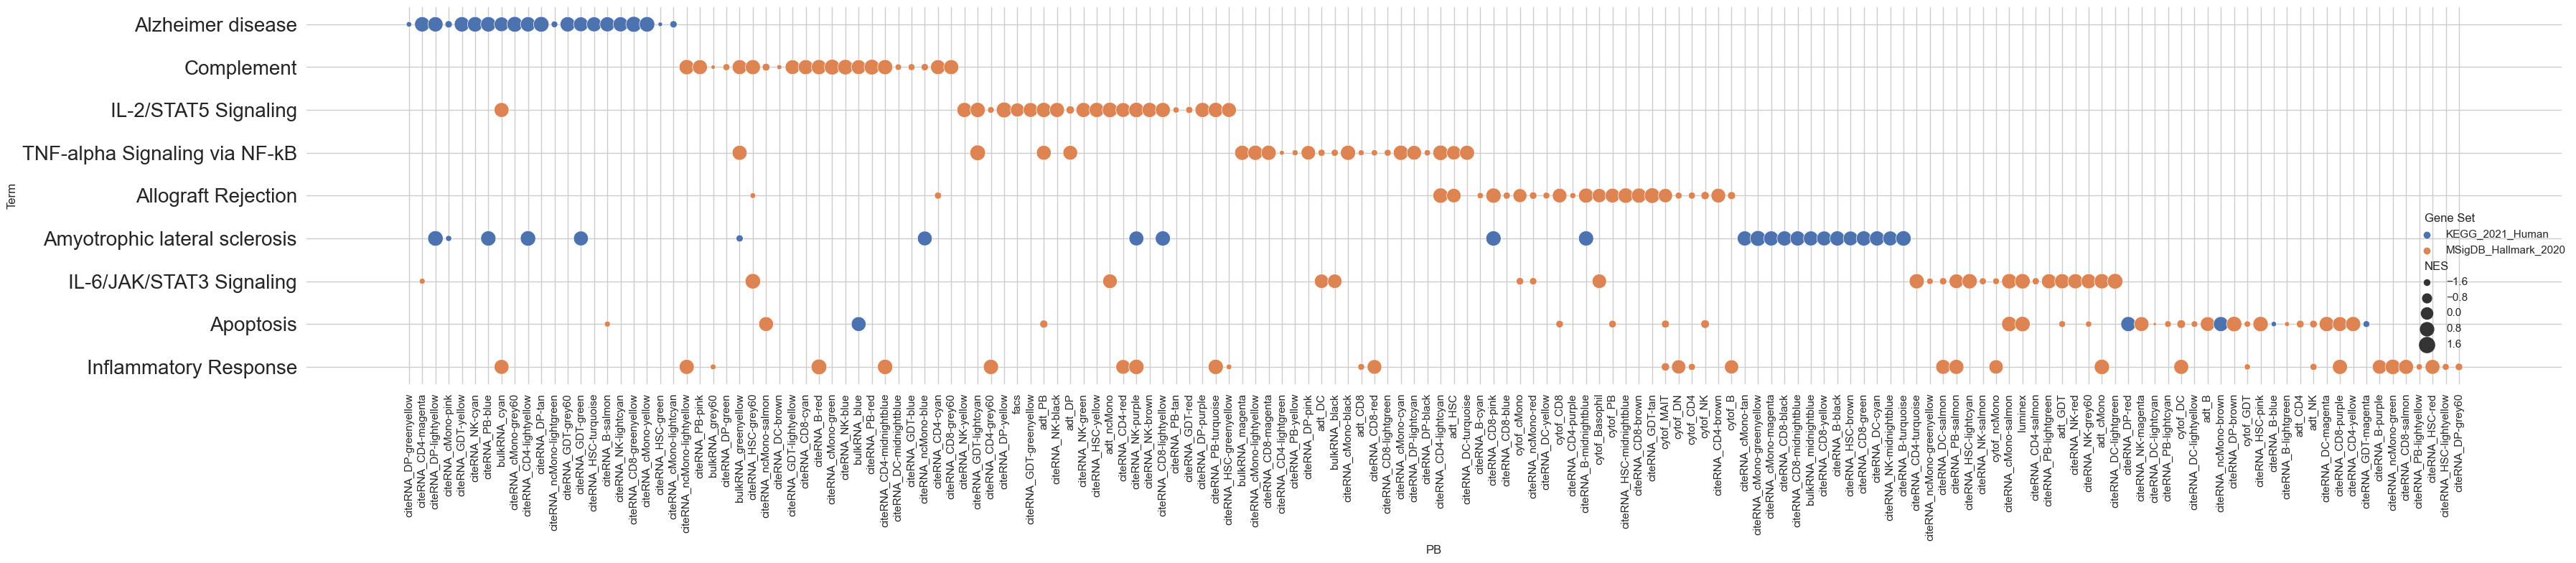

In [346]:
sns.set_theme(style="whitegrid")
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data_ranked_L1_subset,
    x="PB", y="Term",
    hue="Gene Set", size="NES",
    #palette=cmap, 
    sizes=(10, 250),
    height=8, aspect=4
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.yticks(size = 20)

/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_33007/266386155.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_33007/266386155.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'TNF-alpha Signaling via NF-kB'),
  Text(0, 1, 'Reactive Oxygen Species Pathway'),
  Text(0, 2, 'Xenobiotic Metabolism'),
  Text(0, 3, 'Apoptosis'),
  Text(0, 4, 'IL-6/JAK/STAT3 Signaling'),
  Text(0, 5, 'Interferon Gamma Response'),
  Text(0, 6, 'Adipogenesis'),
  Text(0, 7, 'Protein Secretion'),
  Text(0, 8, 'Axon guidance'),
  Text(0, 9, 'Inflammatory Response'),
  Text(0, 10, 'Apical Junction'),
  Text(0, 11, 'IL-2/STAT5 Signaling'),
  Text(0, 12, 'Hypoxia'),
  Text(0, 13, 'Arachidonic acid metabolism'),
  Text(0, 14, 'Allograft Rejection'),
  Text(0, 15, 'Allograft rejection'),
  Text(0, 16, 'Autoimmune thyroid disease'),
  Text(0, 17, 'KRAS Signaling Dn'),
  Text(0, 18, 'Coagulation'),
  Text(0, 19, 'Fatty Acid Metabolism'),
  Text(0, 20, 'Alzheimer disease'),
  Text(0, 21, '

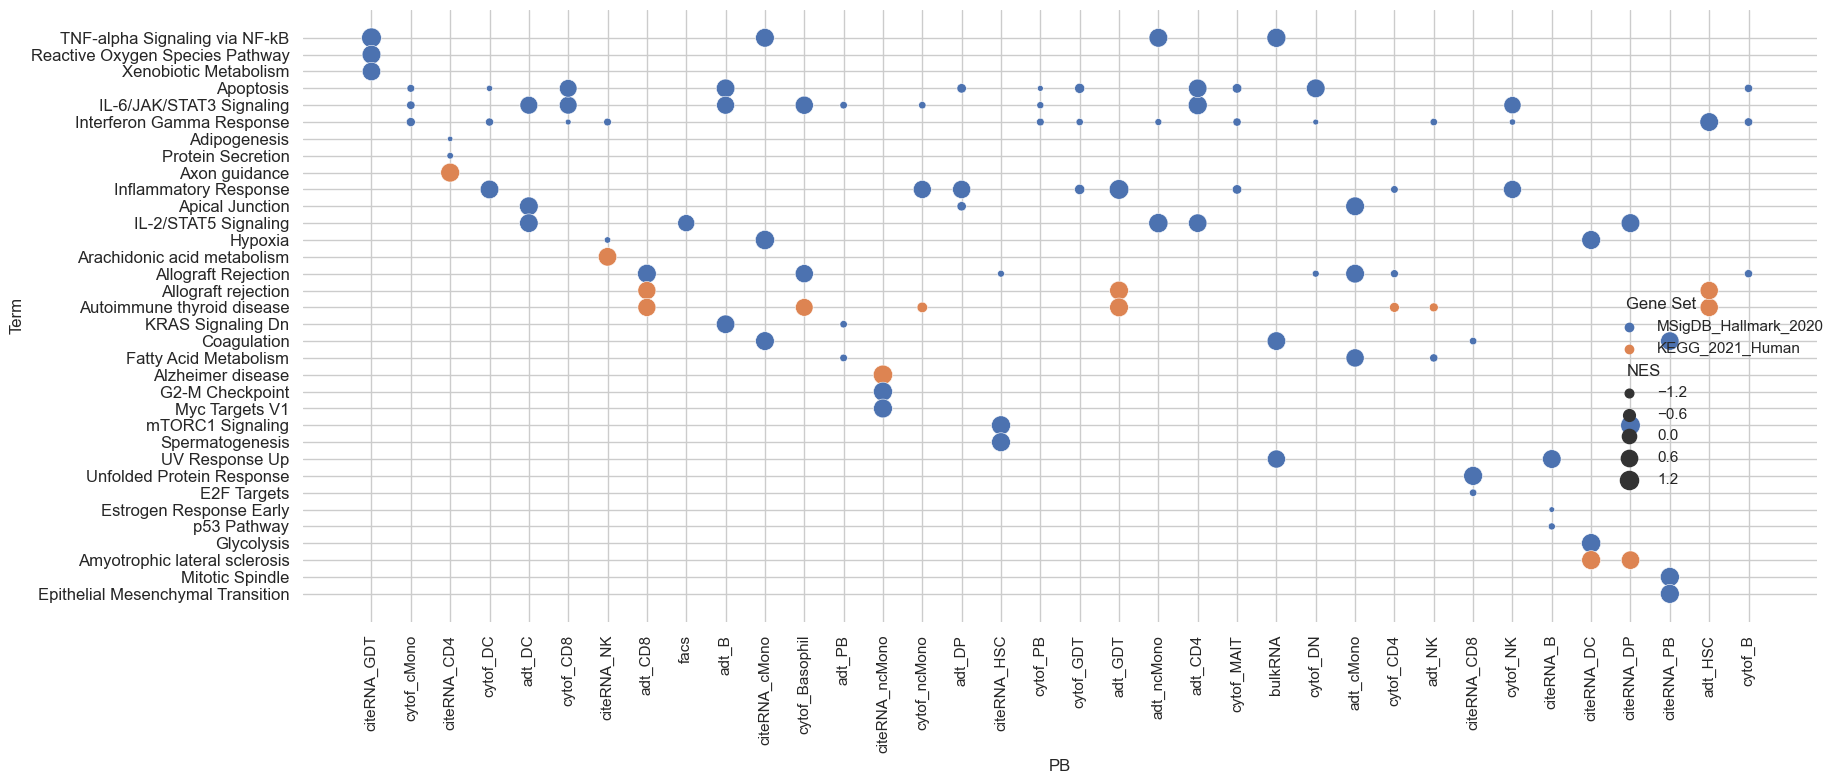

In [350]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data_ranked_L2,
    x="PB", y="Term",
    hue="Gene Set", size="NES",
    #palette=cmap, 
    sizes=(15, 200),
    height=8, aspect=2
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.yticks(size = 12)

/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_33007/2151234174.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_33007/2151234174.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'IL-2/STAT5 Signaling'),
  Text(0, 1, 'Autoimmune thyroid disease'),
  Text(0, 2, 'IL-6/JAK/STAT3 Signaling'),
  Text(0, 3, 'Allograft Rejection'),
  Text(0, 4, 'AMPK signaling pathway'),
  Text(0, 5, 'Adipogenesis'),
  Text(0, 6, 'Apical Junction'),
  Text(0, 7, 'Xenobiotic Metabolism'),
  Text(0, 8, 'Alcoholism'),
  Text(0, 9, 'mTORC1 Signaling'),
  Text(0, 10, 'B cell receptor signaling pathway'),
  Text(0, 11, 'KRAS Signaling Dn'),
  Text(0, 12, 'Fatty Acid Metabolism')])

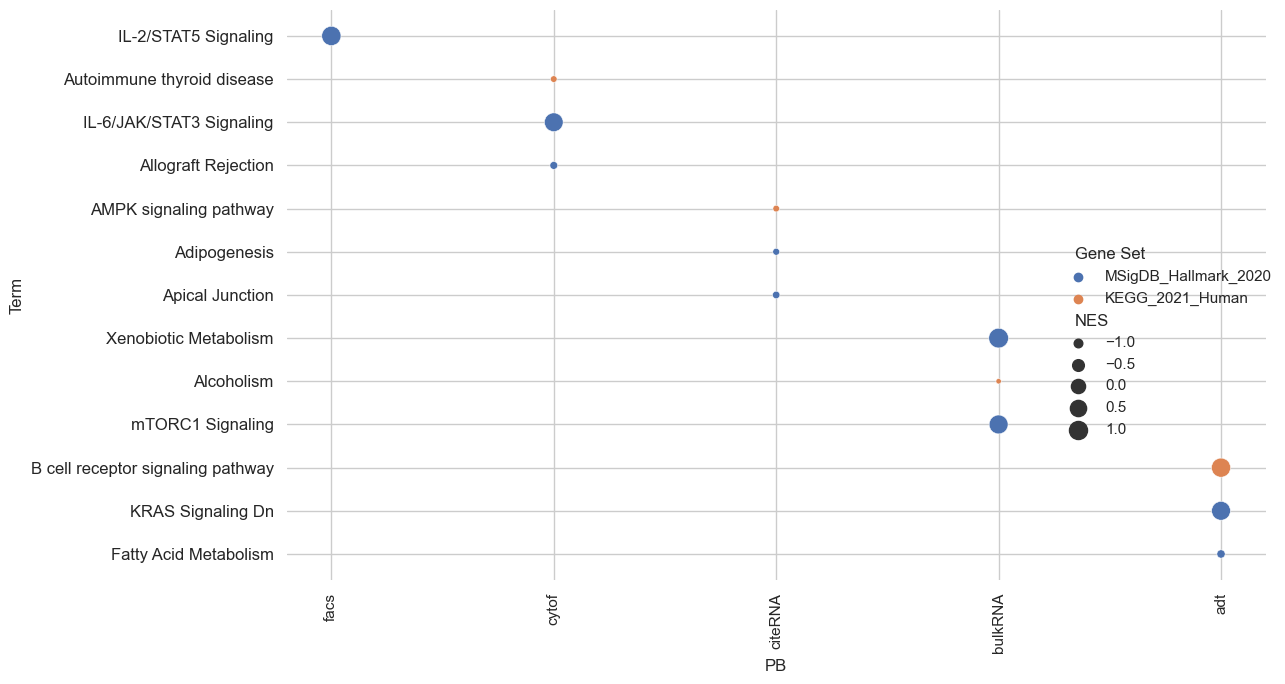

In [343]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data_ranked_L3,
    x="PB", y="Term",
    hue="Gene Set", size="NES",
    #palette=cmap, 
    sizes=(15, 200),
    height=7, aspect=1.5
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.yticks(size = 12)

In [194]:
frequent_pathways = {k: v for k, v in sorted(dict(data_unranked_L1.groupby("Term").count()["P-Value"]).items(), key=lambda item: item[1]) if v >= 20} # sort according to scores

data_unranked_L1_subset = None
for term in list(frequent_pathways.keys()):
    subset = data_unranked_L1[data_unranked_L1["Term"] ==  term]
    if data_unranked_L1_subset is None:
        data_unranked_L1_subset = subset
    else:
        data_unranked_L1_subset = pd.concat([data_unranked_L1_subset,subset], axis = 0)

data_unranked_L1_subset

,Term,Gene Set,P-Value,PB
91,Cell adhesion molecules,KEGG_2021_Human,2.0,cytof_cMono
220,Cell adhesion molecules,KEGG_2021_Human,2.0,cytof_DC
229,Cell adhesion molecules,KEGG_2021_Human,3.405,adt_DC
235,Cell adhesion molecules,KEGG_2021_Human,2.0,cytof_CD8
274,Cell adhesion molecules,KEGG_2021_Human,3.405,adt_CD8
...,...,...,...,...
612,TNF-alpha Signaling via NF-kB,MSigDB_Hallmark_2020,13.384,citeRNA_NK-lightcyan
642,TNF-alpha Signaling via NF-kB,MSigDB_Hallmark_2020,10.132,citeRNA_CD4-lightcyan
711,TNF-alpha Signaling via NF-kB,MSigDB_Hallmark_2020,8.12,citeRNA_cMono-lightcyan
717,TNF-alpha Signaling via NF-kB,MSigDB_Hallmark_2020,12.31,citeRNA_ncMono-magenta


In [ ]:
**Level 1:**
- Cell adhesion molecules are enriched in CyTOF and ADT.
- Hematopoietic cell lineage is enriched in citeRNA, CyTOF and ADT.
- IL-2/STAT5 Signaling, Oxidative Phosphorylation, Ribosome, TNF-alpha Signaling via NF-kB are detected exclusively in citeRNA.
- Coronavirus disease is also detected only in citeRNA, particularly among the greenyellow and magenta gene-modules.
- Inflammatory Response is enriched mainly in the lightcyan and lightgreen gene-modules of citeRNA.

**Level 2:**
- Protein processing in the endoplasmic reticulum and Coronavirus disease are present in almost all citeRNA feature matrices.
- Ribosome is enriched in all citeRNA pseudobulks.
- Viral protein interaction with cytokine and cytokine receptor, Cytokine-cytokine receptor interaction and Chemokine signaling pathway are present in the FACS pseudobulk.
- Neutrophil extracellular trap formation and Systemic lupus erythematosus pathways are detected in bulkRNA.
- T cell receptor signaling pathway is enriched in CyTOF.
- Allograft Rejection is enriched in ADT.
- Hematopoietic cell lineage and Cell adhesion molecules could be observed among feature matrices of the ADT and the CyTOF modalities.
- Unfolded Protein Response could be observed among citeRNA and bulkRNA feature matrices.

**Level 3:**
- Viral protein interaction with cytokine and cytokine receptor, Cytokine-cytokine receptor interaction and Chemokine signaling pathway can be seen in FACS.
- T cell receptor signaling pathway is present in CyTOF.
- Interferon Alpha Response and Myogenesis are detected in citeRNA.
- KRAS Signaling Dn and TNF-alpha Signaling via NF-kB could be observed in bulkRNA.
- Allograft Rejection is enriched in ADT.
- Hematopoietic cell lineage and Cell adhesion molecules are enriched in CyTOF and ADT.
- KRAS Signaling Up is enriched in citeRNA and bulkRNA.

In [318]:
print(set(list(data_ranked_L3["Term"]) + list(data_ranked_L2["Term"]) + list(data_ranked_L1_subset["Term"]) + list(data_unranked_L3["Term"]) + list(data_unranked_L2["Term"]) + list(data_unranked_L1_subset["Term"])))

{'Hematopoietic cell lineage', 'Allograft rejection', 'KRAS Signaling Up', 'Inflammatory Response', 'Alzheimer disease', 'Mitotic Spindle', 'Interferon Alpha Response', 'Apical Junction', 'Fatty Acid Metabolism', 'Protein Secretion', 'Amyotrophic lateral sclerosis', 'TNF-alpha Signaling via NF-kB', 'Arachidonic acid metabolism', 'G2-M Checkpoint', 'Alcoholism', 'Epithelial Mesenchymal Transition', 'T cell receptor signaling pathway', 'Unfolded Protein Response', 'IL-6/JAK/STAT3 Signaling', 'Chemokine signaling pathway', 'Estrogen Response Early', 'Viral protein interaction with cytokine and cytokine receptor', 'B cell receptor signaling pathway', 'Reactive Oxygen Species Pathway', 'Cell adhesion molecules', 'Allograft Rejection', 'Adipogenesis', 'Neutrophil extracellular trap formation', 'Oxidative Phosphorylation', 'UV Response Up', 'Autoimmune thyroid disease', 'Glycolysis', 'Ribosome', 'Axon guidance', 'Spermatogenesis', 'KRAS Signaling Dn', 'Hypoxia', 'Xenobiotic Metabolism', 'Coro

In [306]:
data_ranked_L3[data_ranked_L3["Term"] == "Protein Secretion"]

,Term,Gene Set,NES,P-Value,Rank,PB


In [292]:
data_ranked_L1_subset["Term"].unique()

array(['Alzheimer disease', 'Complement', 'IL-2/STAT5 Signaling',
       'TNF-alpha Signaling via NF-kB', 'Allograft Rejection',
       'Amyotrophic lateral sclerosis', 'IL-6/JAK/STAT3 Signaling',
       'Apoptosis', 'Inflammatory Response'], dtype=object)

/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_33007/457694940.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_33007/457694940.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Cell adhesion molecules'),
  Text(0, 1, 'Inflammatory Response'),
  Text(0, 2, 'Coronavirus disease'),
  Text(0, 3, 'Hematopoietic cell lineage'),
  Text(0, 4, 'IL-2/STAT5 Signaling'),
  Text(0, 5, 'Oxidative Phosphorylation'),
  Text(0, 6, 'Ribosome'),
  Text(0, 7, 'TNF-alpha Signaling via NF-kB')])

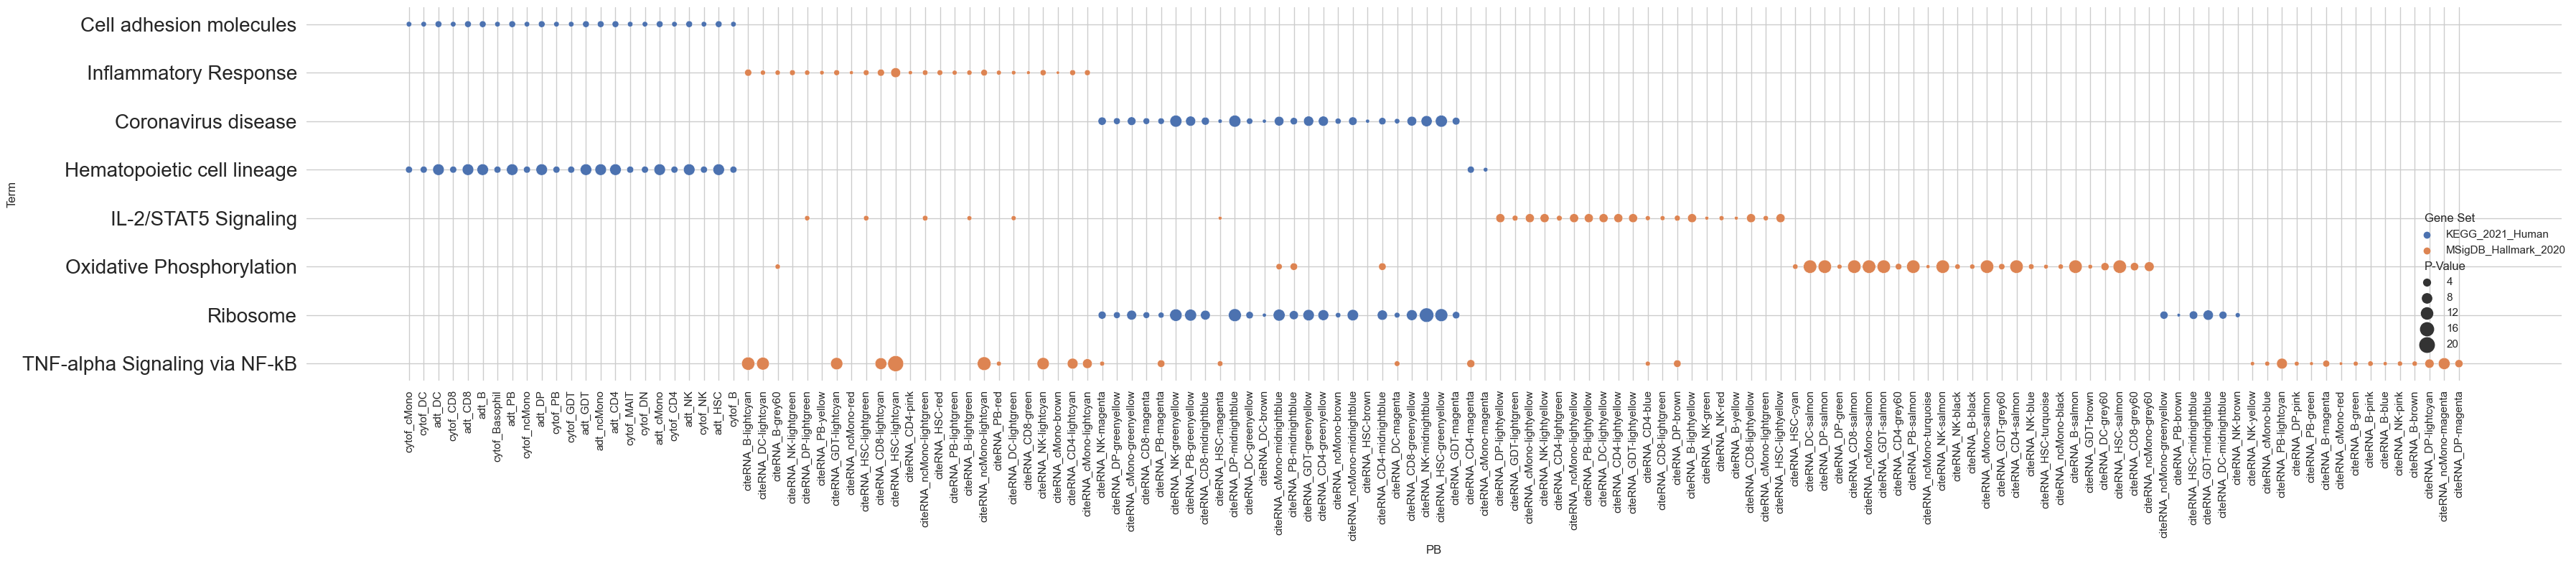

In [340]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data_unranked_L1_subset,
    x="PB", y="Term",
    hue="Gene Set", size="P-Value",
    #palette=cmap, 
    sizes=(10, 250),
    height=8, aspect=4
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.yticks(size = 20)

/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_33007/4272986245.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_33007/4272986245.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Protein processing in endoplasmic reticulum'),
  Text(0, 1, 'Ribosome'),
  Text(0, 2, 'Coronavirus disease'),
  Text(0, 3, 'Hematopoietic cell lineage'),
  Text(0, 4, 'Cell adhesion molecules'),
  Text(0, 5, 'T cell receptor signaling pathway'),
  Text(0, 6, 'Allograft Rejection'),
  Text(0, 7, 'Unfolded Protein Response'),
  Text(0, 8, 'Viral protein interaction with cytokine and cytokine receptor'),
  Text(0, 9, 'Cytokine-cytokine receptor interaction'),
  Text(0, 10, 'Chemokine signaling pathway'),
  Text(0, 11, 'Neutrophil extracellular trap formation'),
  Text(0, 12, 'Systemic lupus erythematosus')])

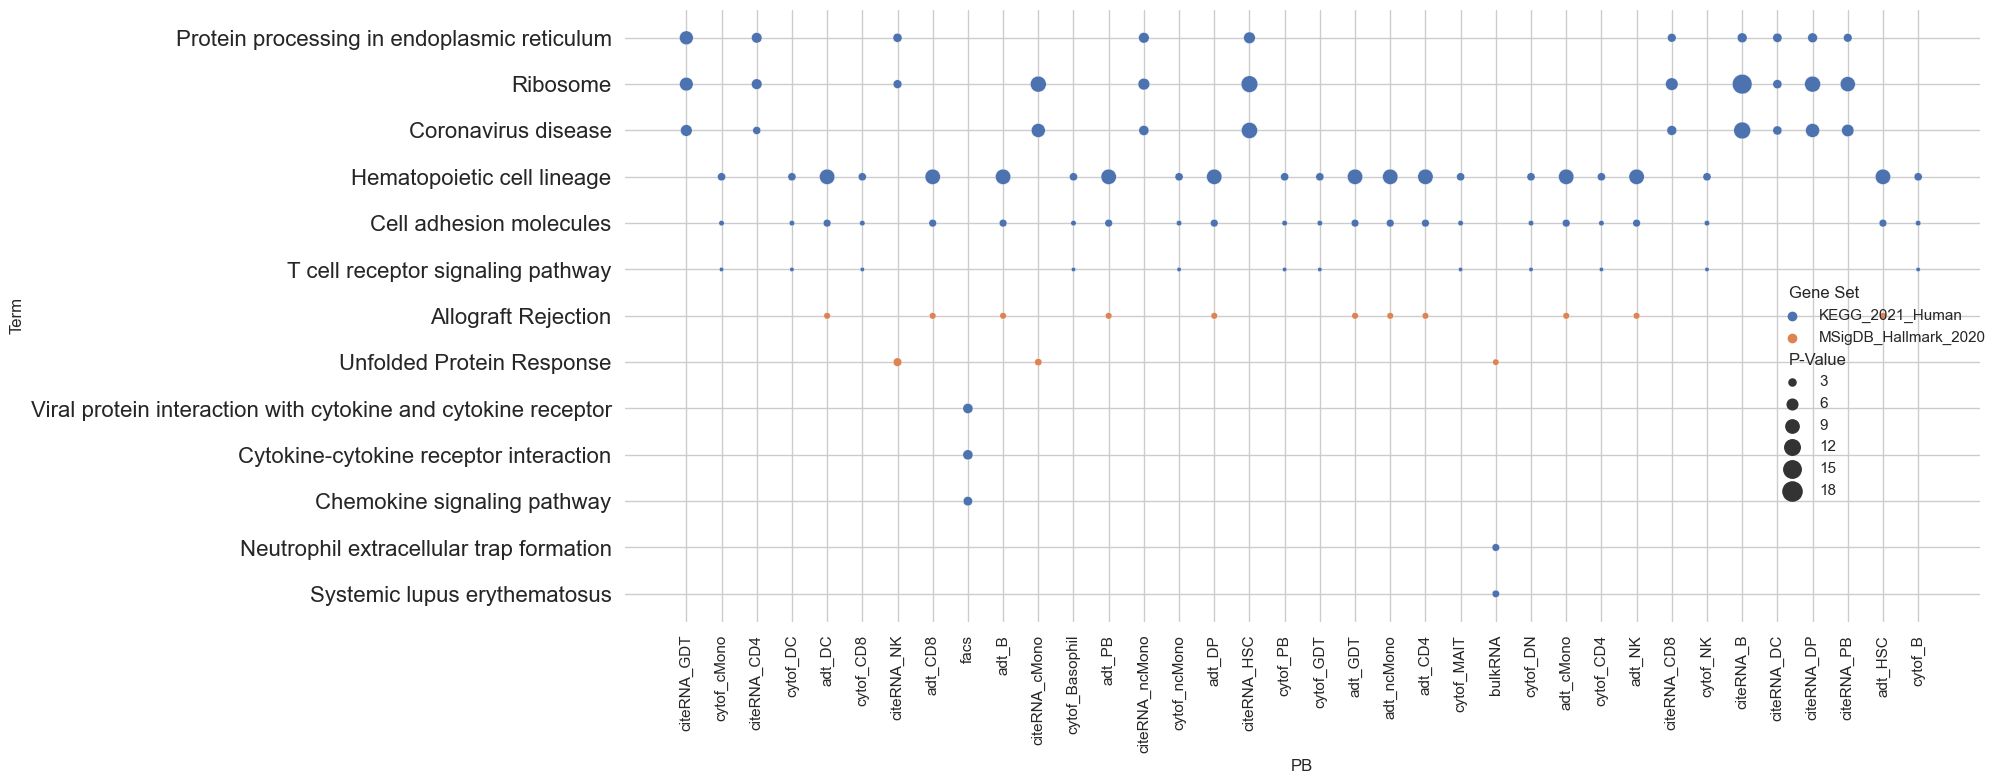

In [341]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data_unranked_L2,
    x="PB", y="Term",
    hue="Gene Set", size="P-Value",
    #palette=cmap, 
    sizes=(10, 200),
    height=8, aspect=2
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.yticks(size = 16)

/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Viral protein interaction with cytokine and cytokine receptor'),
  Text(0, 1, 'Cytokine-cytokine receptor interaction'),
  Text(0, 2, 'Chemokine signaling pathway'),
  Text(0, 3, 'Hematopoietic cell lineage'),
  Text(0, 4, 'Cell adhesion molecules'),
  Text(0, 5, 'T cell receptor signaling pathway'),
  Text(0, 6, 'Interferon Alpha Response'),
  Text(0, 7, 'KRAS Signaling Up'),
  Text(0, 8, 'Myogenesis'),
  Text(0, 9, 'KRAS Signaling Dn'),
  Text(0, 10, 'TNF-alpha Signaling via NF-kB'),
  Text(0, 11, 'Allograft Rejection')])

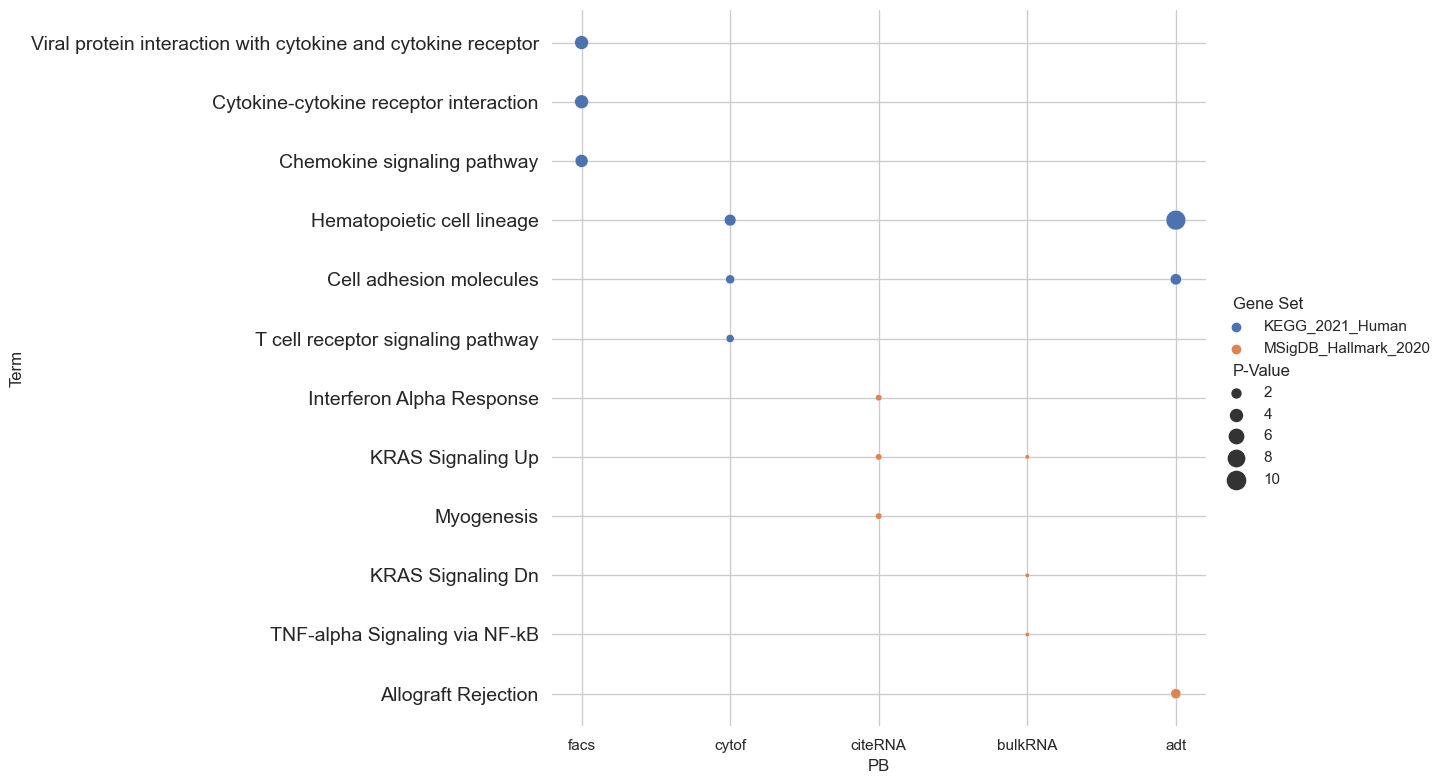

In [342]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data_unranked_L3,
    x="PB", y="Term",
    hue="Gene Set", size="P-Value",
    #palette=cmap, 
    sizes=(10, 200),
    height=8, aspect=1.5
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
plt.yticks(size = 14)